# Time series

#### $by$ $Anastasiia$ $Khaburska$



 ___________________________________________________________________




### Problem 3: Simple forecasting and forecasting with exponential smoothing with BeerWineUS.csv.

Data: retail sales of beer, wine and liquor in the U.S. Monthly data from January 1992 till November 2017 (Source: Federal Reserve Bank of St. Louis, file:
BeerWineUS.csv).


#### Begin the forecasting starting with the observation 201. Thus the out-of-sample performance of the below methods will be assessed using the forecasts for the periods 201 to 311.

#### (a) Compute forecasts using simple EWMA, Holt and Holt-Winters forecasts with the smoothing parameters calibrated from the first 200 observations.

In [1]:
library(ggplot2)
library(forecast)
library(TTR)

In [2]:
df <- read.csv("BeerWineUS.csv")
colnames(df) <- c("date", "sales")
df$date <- as.Date(df$date)
print("number of dates", str(nrow(df)))

 int 311
[1] "number of dates"


In [3]:
#"Train series :"
#df$sales[1:200]

#"Test series :"
#df$sales[201:311]

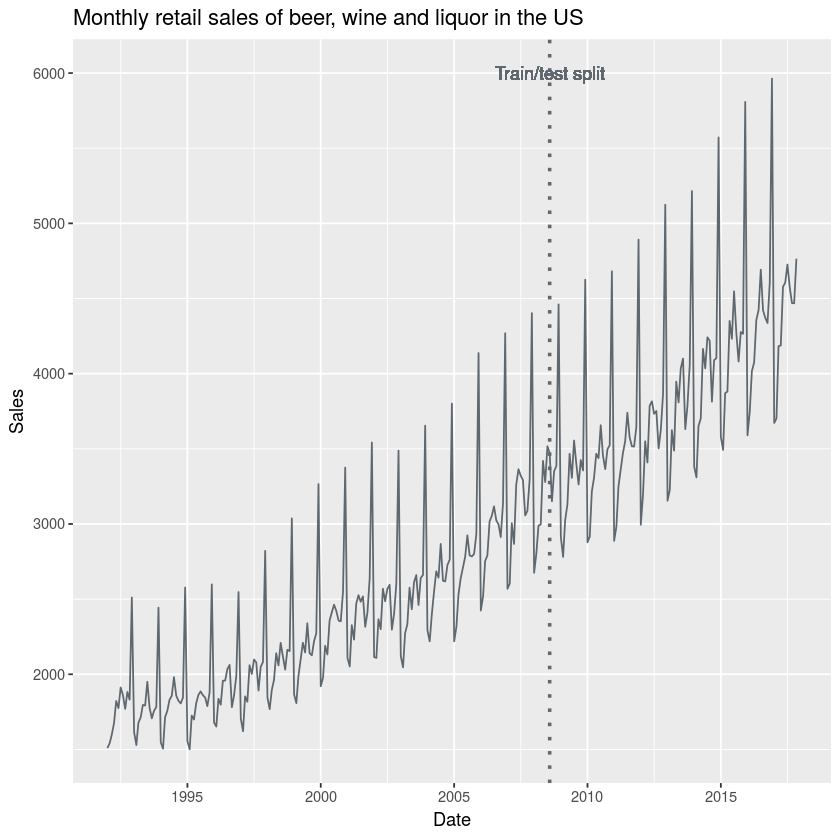

In [4]:
ggplot(df, aes(x = date, y = sales)) +
geom_line(color='#5f676f') +
ggtitle('Monthly retail sales of beer, wine and liquor in the US') +
geom_vline(xintercept = as.Date(df$date[200]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[200]), y = 6000, label = 'Train/test split'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Sales')

#### <span style="color:#549c0e"> Forecasting with EWMA($\alpha$):</span>

Exponentially weighted moving average (EWMA) is an moving avarage algorithm that decreases the impact (weights) of past values.

### <span style="color:#549c0e"> $Ŷ_{t+1} = α(Y_t − Ŷ_t ) + Ŷ_t = αY_t + (1 − α) Ŷ_t$</span>

#### <span style="color:#549c0e">  with $α ∈ (0, 1]$</span>

#### <span style="color:#549c0e">  $Ŷ_{t+h} = Ŷ_{t+1}$ for $h > 1$</span>

So no trend and no seasonality is taken into account. The parameter α can be
changed adaptively (calibrated on train observations).

I will use the R-Package <span style="color:#549c0e">‘forecast’</span> and the <span style="color:#549c0e">HoltWinters</span> object methods. If set beta parametr of HoltWinters to FALSE, the function will not take into account trend. Gamma is a parameter used for the seasonal component. If set to FALSE, a non-seasonal model is fitted. So, <span style="color:#549c0e">with both beta and gamma set to FALSE, I will get single exponential smoothing.</span>

In [5]:
mydat <- ts(df$sales[0:200], frequency = 12)

In [6]:
df.sales.ewma <- HoltWinters(mydat, beta=FALSE, gamma=FALSE)

In [7]:
df.sales.ewma

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = mydat, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.1180129
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 3241.657

#### <span style="color:#549c0e">EWMA forecast for the periods 201 to 311, with the smoothing parameter $\alpha$ calibrated from the first 200 observations:</span>

In [8]:
df.sales.ewma.predicted=predict(df.sales.ewma,111, prediction.interval = TRUE)
#df.sales.ewma.predicted

In [9]:
df$ewma<-c(df.sales.ewma$fitted[1],df.sales.ewma$fitted[1:199], df.sales.ewma.predicted[1:111])

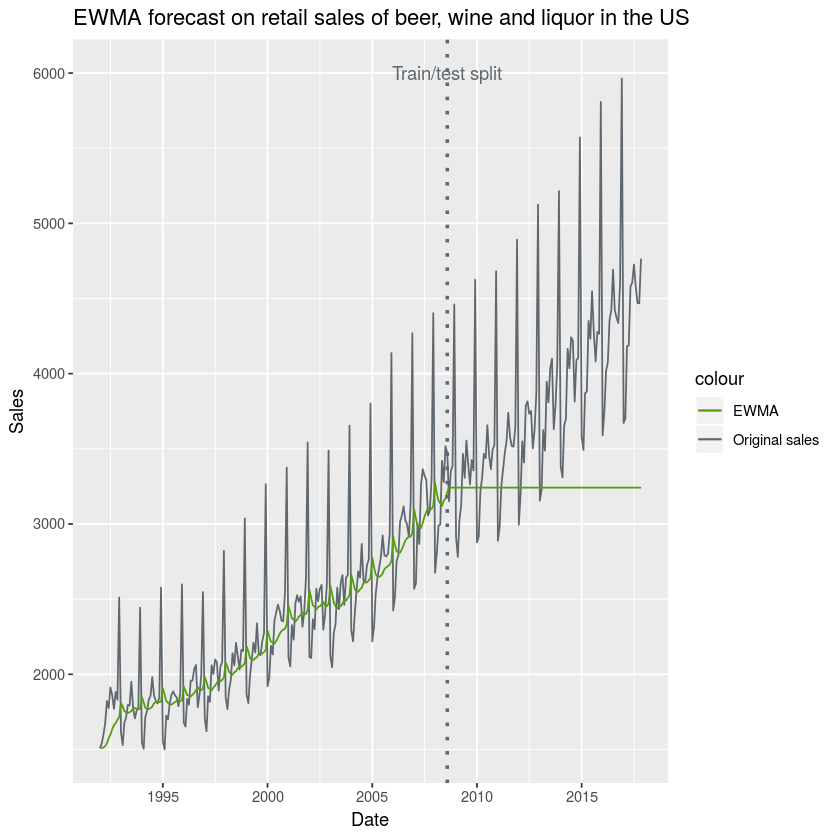

In [10]:
ggplot() +
geom_line(data = df, aes(x = date, y = sales, color = "Original sales")) +
geom_line( data=df, aes(x = date, y = ewma, color = 'EWMA')) +
ggtitle('EWMA forecast on retail sales of beer, wine and liquor in the US') +
geom_vline(xintercept = as.Date(df$date[200]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[200]), y = 6000, label = 'Train/test split'), angle = 0, color = "#5f676f") +
scale_colour_manual(values = c("Original sales"="#5f676f" ,"EWMA"="#549c0e")) +
xlab('Date') +
ylab('Sales')

#### <span style="color:#008db9"> Forecasting with Holt($\alpha , \beta\$):</span>

Holt is a forecasting method, which uses a exponential smoothing and
captures trends. Similar to EWMA but uses a trend component, which reacts to the changes in the
level of the observations. If the level changes, then there is a trend: the trend T t consists of the
smoothed changes in the level.

#### Level:  <span style="color:#008db9"> $L_t = αY_t + (1 − α)(L_{t−1} + T_{t−1} )$</span>  with  <span style="color:#008db9"> $α ∈ (0, 1]$</span>

#### Trend:  <span style="color:#008db9"> $T_t = β(L_t − L_{t−1} ) + (1 − β)T_{t−1}$</span>  with  <span style="color:#008db9"> $\beta ∈ (0, 1]$</span>

The forecast consists of the level and the h-step-ahead forecast of the
trend:
#### <span style="color:#008db9">  $Ŷ_{t+h} = L_t + T_th$</span>

So no seasonality is taken into account, just a trend.

I will use the R-Package <span style="color:#008db9">‘forecast’</span> and the <span style="color:#008db9">HoltWinters</span> object methods. If set beta parametr of HoltWinters to TRUE, the function will take into account trend. Gamma is a parameter used for the seasonal component. If set to FALSE, a non-seasonal model is fitted. So, <span style="color:#008db9">with beta=TRUE and gamma=FALSE, I will get Holt forecasting.</span>

In [11]:
df.sales.holt <- HoltWinters(mydat, beta=TRUE, gamma=FALSE)

In [12]:
df.sales.holt

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = mydat, beta = TRUE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.0402968
 beta : TRUE
 gamma: FALSE

Coefficients:
        [,1]
a 3227.15523
b   10.46212

In [13]:
#df.sales.holt$fitted

#### <span style="color:#008db9">Holt forecast for the periods 201 to 311, with the smoothing parameter $\alpha$ and the trend parameter $\beta$ calibrated from the first 200 observations:</span>

In [14]:
df.sales.holt.predicted=predict(df.sales.holt,111, prediction.interval = TRUE)
#df.sales.holt.predicted
#df.sales.holt.predicted$mean

In [15]:
df$holt<-c(df.sales.holt$fitted[1],df.sales.holt$fitted[1],df.sales.holt$fitted[1:198],df.sales.holt.predicted[1:111])
df$holt.upr<-c(df.sales.holt$fitted[1],df.sales.holt$fitted[1],df.sales.holt$fitted[1:198],df.sales.holt.predicted[112:222])
df$holt.lwr<-c(df.sales.holt$fitted[1],df.sales.holt$fitted[1],df.sales.holt$fitted[1:198],df.sales.holt.predicted[223:333])
#df

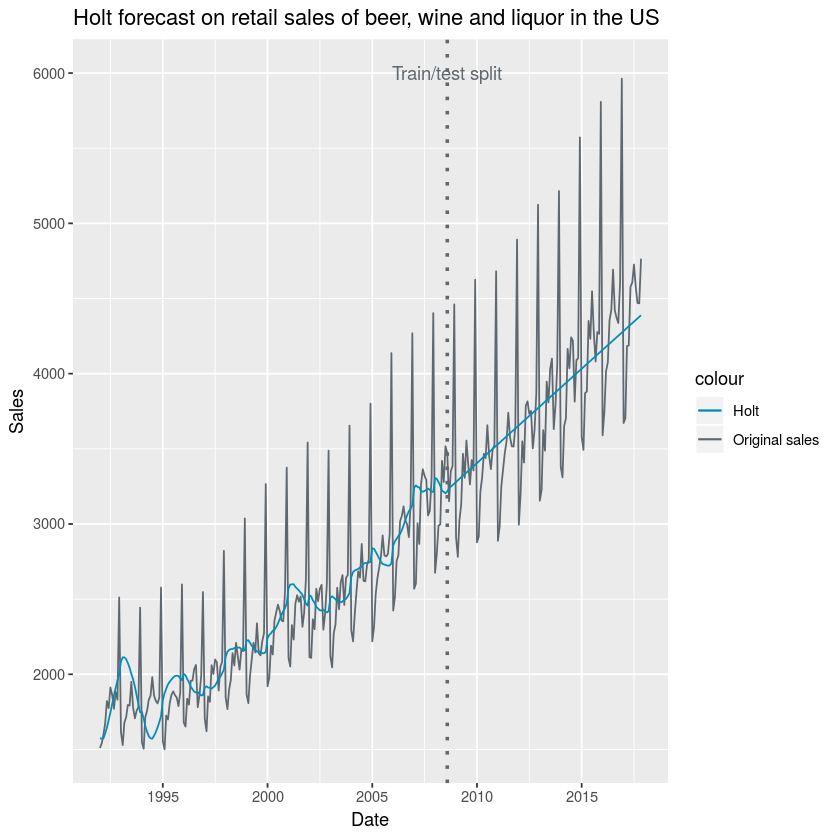

In [16]:
ggplot() +
geom_line(data = df, aes(x = date, y = sales, color = 'Original sales')) +
geom_line( data=df, aes(x = date, y = holt, color = 'Holt')) +
ggtitle('Holt forecast on retail sales of beer, wine and liquor in the US') +
geom_vline(xintercept = as.Date(df$date[200]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[200]), y = 6000, label = 'Train/test split'), angle = 0, color = '#5f676f') +
scale_colour_manual(values = c("Original sales"="#5f676f" ,"Holt"="#008db9")) +
xlab('Date') +
ylab('Sales')

#### <span style="color:#ae3131"> Holt-Winters forecasting ($\alpha , \beta, \gamma$):</span>

Holt-Winters is a forecasting method, which uses a exponential smoothing,
captures trends and seasonality. Similar to Holt but uses a seasonal component, which is determined as a smoothed deviation of $Y_t$ from the level $L_t$ . 

#### Level:  <span style="color:#ae3131"> $α(Y_t − S_{t−s} ) + (1 − α)(L_{t−1} + T_{t−1} )$</span>  with  <span style="color:#ae3131"> $α ∈ (0, 1]$</span>

#### Trend:  <span style="color:#ae3131"> $T_t = β(L_t − L_{t−1} ) + (1 − β)T_{t−1}$</span>  with  <span style="color:#ae3131"> $\beta ∈ (0, 1]$</span>

#### Season:  <span style="color:#ae3131"> $S_t = γ(Y_t − L_t ) + (1 − γ)S_{t−s}$</span>  with  <span style="color:#ae3131"> $\gamma ∈ (0, 1]$</span>

The forecast consists of the level, the h-step-ahead forecast of the
trend and seasonal addition:
#### <span style="color:#ae3131">  $Ŷ_{t+h} = L_t + T_th+ S_{t−s+h}$</span>

I will use the R-Package <span style="color:#ae3131">‘forecast’</span> and the <span style="color:#ae3131">HoltWinters</span> object methods. <span style="color:#ae3131">With beta=TRUE and gamma=TRUE, to take into account trend and season, I will get Holt forecasting.</span>

In [17]:
df.sales.holtwinters <- HoltWinters(mydat,seasonal = "additive")

In [18]:
df.sales.holtwinters

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = mydat, seasonal = "additive")

Smoothing parameters:
 alpha: 0.2805565
 beta : 0.02987376
 gamma: 0.9208883

Coefficients:
          [,1]
a   3258.47873
b     12.05534
s1   -77.24856
s2   -54.67468
s3   150.80684
s4  1257.90228
s5  -463.90692
s6  -358.85935
s7  -135.92297
s8  -146.83738
s9   239.22670
s10  137.23388
s11  298.17342
s12  205.63134

#### <span style="color:#ae3131">Holt-Winters forecasting for the periods 201 to 311, with the smoothing parameter $\alpha$, the trend parameter $\beta$,and the seasonal parameter $\gamma$ calibrated from the first 200 observations:</span>

In [19]:
df.sales.holtwinters.predicted=predict(df.sales.holtwinters,111, prediction.interval = TRUE)
#df.sales.holtwinters.predicted

In [20]:
df$holtwinters<-c(rep(df.sales.holtwinters$fitted[1], 12),df.sales.holtwinters$fitted[1:188],df.sales.holtwinters.predicted[1:111])
df$holtwinters.upr<-c(rep(df.sales.holtwinters$fitted[1], 12),df.sales.holtwinters$fitted[1:188],df.sales.holtwinters.predicted[112:222])
df$holtwinters.lwr<-c(rep(df.sales.holtwinters$fitted[1], 12),df.sales.holtwinters$fitted[1:188],df.sales.holtwinters.predicted[223:333])
#df

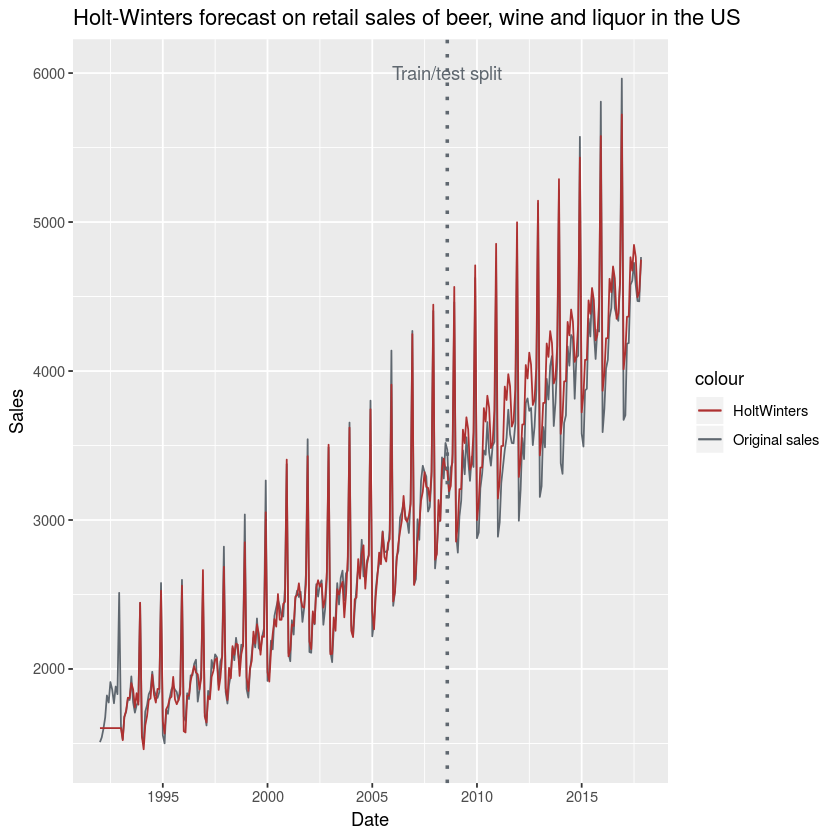

In [21]:
ggplot() +
geom_line(data = df, aes(x = date, y = sales, color = 'Original sales')) +
geom_line( data=df, aes(x = date, y = holtwinters, color = 'HoltWinters'), show.legend=TRUE) +
ggtitle('Holt-Winters forecast on retail sales of beer, wine and liquor in the US') +
scale_colour_manual(values = c("Original sales"="#5f676f" ,"HoltWinters"="#ae3131")) +
geom_vline(xintercept = as.Date(df$date[200]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[200]), y = 6000, label = 'Train/test split'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Sales')

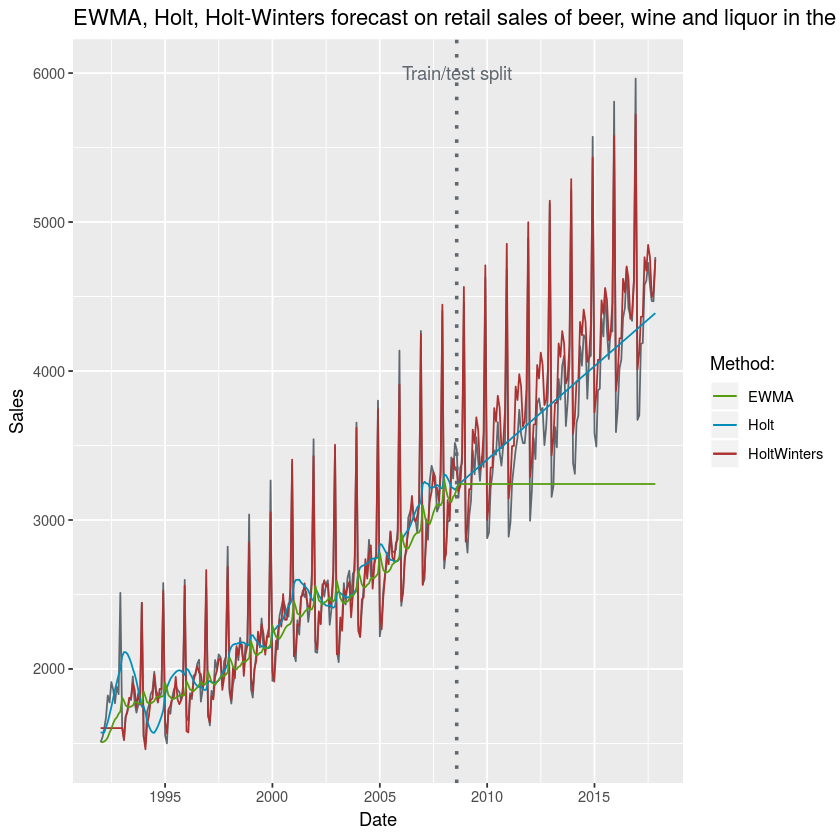

In [22]:
ggplot() +
geom_line(data = df, aes(x = date, y = sales), color = '#5f676f') +
geom_line( data=df, aes(x = date, y = holtwinters, color = 'HoltWinters'), show.legend=TRUE) +
geom_line( data=df, aes(x = date, y = holt, color = 'Holt'), show.legend=TRUE) +
geom_line( data=df, aes(x = date, y = ewma, color = 'EWMA'), show.legend=TRUE) +
ggtitle('EWMA, Holt, Holt-Winters forecast on retail sales of beer, wine and liquor in the US') +
scale_colour_manual(name="Method:",values = c("EWMA"="#549c0e", "Holt"="#008db9", "HoltWinters"="#ae3131")) +
geom_vline(xintercept = as.Date(df$date[200]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[200]), y = 6000, label = 'Train/test split'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Sales')

#### (b) Compute the corresponding MSE losses. Check the ACF of the forecast errors.

The in-sample losses using the train periods 1 to 200.

In [23]:
"EWMA loss MSE: "
MSE_EWMA<-sum((df$ewma[12:200]-df$sales[12:200])**2)/188
MSE_EWMA

"Holt loss MSE: "
MSE_Holt<-sum((df$holt[12:200]-df$sales[12:200])**2)/188
MSE_Holt

"Holt-Winters loss MSE: "
MSE_HoltWinters<-sum((df$holtwinters[12:200]-df$sales[12:200])**2)/188
MSE_HoltWinters

[1] "EWMA loss MSE: "

[1] 127546.6

[1] "Holt loss MSE: "

[1] 131862.1

[1] "Holt-Winters loss MSE: "

[1] 9781.044

The out-of-sample performance assessed using the forecasts for the periods 201 to 311.

In [24]:
"EWMA forecast MSE: "
MSE_EWMA<-sum((df$ewma[201:311]-df$sales[201:311])**2)/111
MSE_EWMA

"Holt forecast MSE: "
MSE_Holt<-sum((df$holt[201:311]-df$sales[201:311])**2)/111
MSE_Holt

"Holt-Winters forecast MSE: "
MSE_HoltWinters<-sum((df$holtwinters[201:311]-df$sales[201:311])**2)/111
MSE_HoltWinters


[1] "EWMA forecast MSE: "

[1] 762018.4

[1] "Holt forecast MSE: "

[1] 231508.8

[1] "Holt-Winters forecast MSE: "

[1] 40595.65

$ρ̂_{ε,h} = Corr(ε̂ _t, ε̂ _{t+h}) = \frac{\sum_{t=1}^{τ −h}{ (ε̂ _t − ε̂  ̄  )(ε̂ _{t+h} − ε̂  ̄  )}}{\sqrt{\sum_{t=1}^{τ −h}{(ε̂ _t − ε̂  ̄ )^2}\sum_{t=1}^{τ −h}{(ε̂ _{t+h} − ε̂  ̄  )^2}}}$

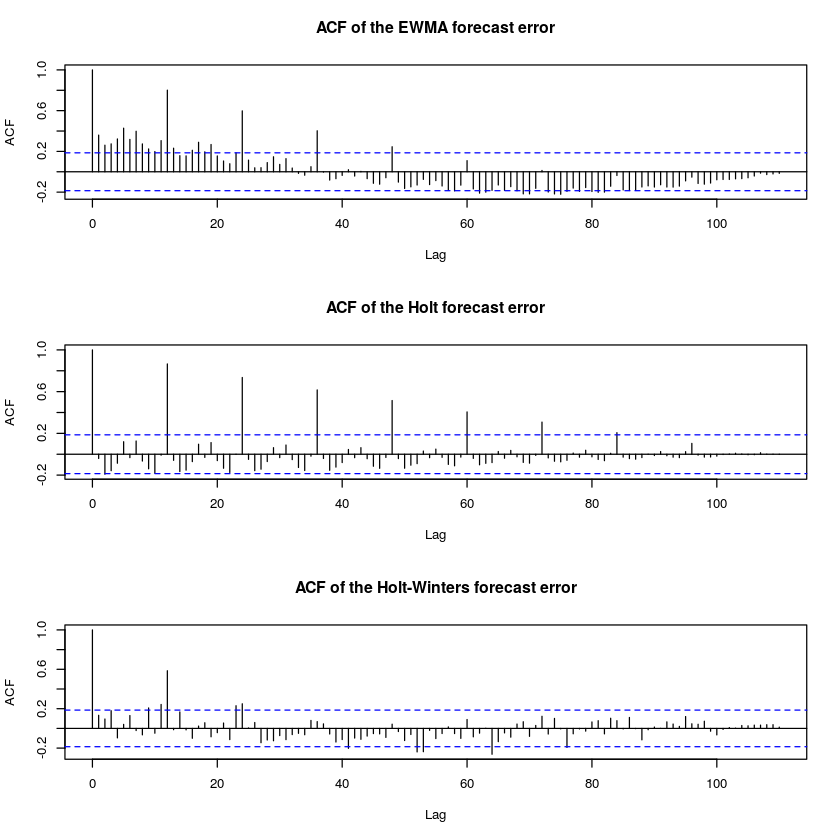

In [25]:
par(mfrow=c(3,1))

ACF_EWMA <- Acf(df$ewma[201:311] - df$sales[201:311], lag.max = 111, plot = FALSE)
plot(ACF_EWMA, main = "ACF of the EWMA forecast error")

ACF_Holt <- Acf(df$holt[201:311] - df$sales[201:311], lag.max = 111, plot = FALSE)
plot(ACF_Holt, main = "ACF of the Holt forecast error")

ACF_HoltWinters <- Acf(df$holtwinters[201:311] - df$sales[201:311], lag.max = 111, plot = FALSE)
plot(ACF_HoltWinters, main = "ACF of the Holt-Winters forecast error")

The ACF for EWMA forecast is visibli decreasing with lag. This indicates that we miss the trend here.

An visibile pattern (possitive(P) , bunch of negative(BN), P,BN,P,BN, .....) can be noticed from the plot of ACF fo Holt forecast. This indicates that we neglect seasonality here.

In ACF for Holt-Winters all the residuals are correlated insignificantly $|corr|<0.2$. This indicates that the forecast is good enough.

#### (c) Compare the performance of the models using the three tests discussed in the lectures.

In [26]:
library(BSDA)

Loading required package: lattice

Attaching package: ‘BSDA’

The following object is masked from ‘package:datasets’:

    Orange



In [27]:
lossMSE_EWMA<-(df$ewma[201:311] - df$sales[201:311])^2
lossMAE_EWMA<-abs(df$ewma[201:311] - df$sales[201:311])
lossMSE_Holt<-(df$holt[201:311] - df$sales[201:311])^2
lossMAE_Holt<-abs(df$holt[201:311] - df$sales[201:311])
lossMSE_HoltWinters<-(df$holtwinters[201:311] - df$sales[201:311])^2
lossMAE_HoltWinters<-abs(df$holtwinters[201:311] - df$sales[201:311])

#### <span style="color:#549c0e"> Lets compare M1 = EWMA; M2=Holt</span>

####  <span style="color:#549c0e">$d_i^{(MSE)}=(\hat {Y_i}^{(M1)} - Y_i)^2-(\hat {Y_i}^{(M2)} - Y_i)^2$</span>

#### <span style="color:#549c0e"> $d_i^{(MAE)}=|\hat {Y_i}^{(M1)} - Y_i)|-|\hat {Y_i}^{(M2)} - Y_i|$</span>

$H_0 $: both models are equivalent.

$H_1$ : one model is better.

<span style="color:#549c0e">Sign-test</span>: if the median of d i equals 0, then for a half of the
sample model 1 is a better choice and the other half the model 2

<span style="color:#549c0e">$T = \frac{2}{111}\sum_{i=1}^{111}{(I(d_t > 0) − 0.5)} = 0$</span>

In [28]:
SIGN.test(lossMAE_EWMA-lossMAE_Holt, md=0)


	One-sample Sign-Test

data:  lossMAE_EWMA - lossMAE_Holt
s = 84, p-value = 5.462e-08
alternative hypothesis: true median is not equal to 0
95 percent confidence interval:
 177.7223 460.0462
sample estimates:
median of x 
   277.4756 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level   L.E.pt   U.E.pt
Lower Achieved CI     0.9428 178.0892 456.5362
Interpolated CI       0.9500 177.7223 460.0462
Upper Achieved CI     0.9637 177.0210 466.7557


In [29]:
SIGN.test(lossMSE_EWMA-lossMSE_Holt, md=0)


	One-sample Sign-Test

data:  lossMSE_EWMA - lossMSE_Holt
s = 84, p-value = 5.462e-08
alternative hypothesis: true median is not equal to 0
95 percent confidence interval:
  73673.37 365940.00
sample estimates:
median of x 
   155945.8 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level   L.E.pt   U.E.pt
Lower Achieved CI     0.9428 77501.67 361082.8
Interpolated CI       0.9500 73673.37 365940.0
Upper Achieved CI     0.9637 66355.45 375224.7


In both MAE end MSE errors <span style="color:#549c0e">SIGN TEST</span> shows that true median is not equal to 0 (p-value<<0.05 we regect $H_0$) and that ($d_i>>0$) M2=Holt forecasting is significantly better than Model1=EWMA.

<span style="color:#549c0e">Wilcoxon-sign-rank-test</span>: does the median of $d_i$ equal 0

In [30]:
wilcox.test(lossMAE_EWMA-lossMAE_Holt)


	Wilcoxon signed rank test with continuity correction

data:  lossMAE_EWMA - lossMAE_Holt
V = 5306, p-value = 1.009e-10
alternative hypothesis: true location is not equal to 0


In [31]:
wilcox.test(lossMSE_EWMA-lossMSE_Holt)


	Wilcoxon signed rank test with continuity correction

data:  lossMSE_EWMA - lossMSE_Holt
V = 5255, p-value = 2.691e-10
alternative hypothesis: true location is not equal to 0


In both MAE end MSE errors <span style="color:#549c0e">Wilcoxon-sign-rank-test</span> shows that true median is not equal to 0 (p-value<<0.05 we regect $H_0$) and that Model2=Holt forecasting is significantly better than Model1=EWMA.


<span style="color:#549c0e">Diebold-Mariano-t-test</span>: is the expectation of $d_i$ equal to 0

In [32]:
t.test(lossMAE_EWMA-lossMAE_Holt)


	One Sample t-test

data:  lossMAE_EWMA - lossMAE_Holt
t = 8.1877, df = 110, p-value = 5.223e-13
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 267.3709 438.1329
sample estimates:
mean of x 
 352.7519 


In [33]:
t.test(lossMSE_EWMA-lossMSE_Holt)


	One Sample t-test

data:  lossMSE_EWMA - lossMSE_Holt
t = 6.6236, df = 110, p-value = 1.337e-09
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 371782.9 689236.3
sample estimates:
mean of x 
 530509.6 


In both MAE end MSE errors 
<span style="color:#549c0e">Diebold-Mariano-t-test</span> shows that the expectation of the true median is not equal to 0 (p-value<<0.05 we regect $H_0$) and that expectation of $d_i$ is much larger than 0 ($d_i^{MAE}$:492; $d_i^{MSE}$:530509), thus Model2=Holt forecasting is significantly better than Model1=EWMA.

#### <span style="color:#008db9">Lets compare M2 = Holt; M3=Holt-Winters </span>

#### <span style="color:#008db9">$d_i^{(MSE)}=(\hat {Y_i}^{(M2)} - Y_i)^2-(\hat {Y_i}^{(M3)} - Y_i)^2$</span>

#### <span style="color:#008db9">$d_i^{(MAE)}=|\hat {Y_i}^{(M2)} - Y_i)|-|\hat {Y_i}^{(M3)} - Y_i|$</span>

$H_0 $: both models are equivalent.

$H_1$ : one model is better.

<span style="color:#008db9">Sign-test</span>: if the median of d i equals 0, then for a half of the
sample model 1 is a better choice and the other half the model 2

<span style="color:#008db9">$T = \frac{2}{111}\sum_{i=1}^{111}{(I(d_t > 0) − 0.5)} = 0$</span>

In [34]:
SIGN.test(lossMAE_Holt-lossMAE_HoltWinters, md=0)


	One-sample Sign-Test

data:  lossMAE_Holt - lossMAE_HoltWinters
s = 66, p-value = 0.05716
alternative hypothesis: true median is not equal to 0
95 percent confidence interval:
  3.642042 77.654224
sample estimates:
median of x 
   36.32965 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level  L.E.pt  U.E.pt
Lower Achieved CI     0.9428  6.0946 77.2115
Interpolated CI       0.9500  3.6420 77.6542
Upper Achieved CI     0.9637 -1.0461 78.5006


In [35]:
SIGN.test(lossMSE_Holt-lossMSE_HoltWinters, md=0)


	One-sample Sign-Test

data:  lossMSE_Holt - lossMSE_HoltWinters
s = 66, p-value = 0.05716
alternative hypothesis: true median is not equal to 0
95 percent confidence interval:
   928.3184 22102.3472
sample estimates:
median of x 
   7866.483 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level    L.E.pt   U.E.pt
Lower Achieved CI     0.9428 1470.7656 21511.72
Interpolated CI       0.9500  928.3184 22102.35
Upper Achieved CI     0.9637 -108.5846 23231.34


In both MAE end MSE errors with regard to the <span style="color:#008db9">SIGN TEST</span> we can not reject the hypothesis that the true median equal to 0 because $p-value > 0.05$. Thus we can not claim that some of the methods is statistically significantly better then the other.

<span style="color:#008db9">Wilcoxon-sign-rank-test</span>: does the median of 𝑑𝑖
equal 0

In [36]:
wilcox.test(lossMAE_Holt-lossMAE_HoltWinters)


	Wilcoxon signed rank test with continuity correction

data:  lossMAE_Holt - lossMAE_HoltWinters
V = 4198, p-value = 0.001348
alternative hypothesis: true location is not equal to 0


In [37]:
wilcox.test(lossMSE_Holt-lossMSE_HoltWinters)


	Wilcoxon signed rank test with continuity correction

data:  lossMSE_Holt - lossMSE_HoltWinters
V = 4256, p-value = 0.0007348
alternative hypothesis: true location is not equal to 0


In both MAE end MSE errors <span style="color:#008db9">Wilcoxon-sign-rank-test</span> shows that true median is not equal to 0 (p-value<<0.05  we regect $H_0$) .


<span style="color:#008db9">Diebold-Mariano-t-test</span>: is the expectation of $d_i$ equal to 0

In [38]:
t.test(lossMAE_Holt-lossMAE_HoltWinters)


	One Sample t-test

data:  lossMAE_Holt - lossMAE_HoltWinters
t = 3.9106, df = 110, p-value = 0.0001596
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  69.00909 210.81380
sample estimates:
mean of x 
 139.9114 


In [39]:
t.test(lossMSE_Holt-lossMSE_HoltWinters)


	One Sample t-test

data:  lossMSE_Holt - lossMSE_HoltWinters
t = 3.6853, df = 110, p-value = 0.0003563
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  88249.01 293577.21
sample estimates:
mean of x 
 190913.1 


In both MAE end MSE errors <span style="color:#008db9">Diebold-Mariano-t-test</span> shows that the expectation of the true median is not equal to 0 (p-value<<0.05  we regect $H_0$) and that expectation of $d_i$ is much larger than 0 ($d_i^{MAE}$:139; $d_i^{MSE}$:190913), thus M3=HoltWinters forecasting is significantly better than M2=Holt.

<span style="color:#ae3131">There is no need in comparing Model1:EWMA and Model3:HolterWinters</span> as according to all three tests Holt is significantly better that EWMA and HoltWinters is significantly better than Holt, thus HoltWinters would be significantly better then EWMA in all three tests as well.

#### So in this time series the trend and the seasonality are really important.

### 4. ARMA modelling with interestrate.csv. Keep the last year for forecasting.

Data: real (inflation corrected) interest rate for bank deposits with investment
durations between one and two years (Source: Deutsche Bundesbank / German Central
Bank, file: interestrate.csv).

In [40]:
df <- read.csv("interestrate.csv", sep = ';')
df$X <- NULL
df <- df[, !(names(df) %in% c('x'))]
df$date <- as.Date(paste(df$date,"-01",sep=""), "%Y-%m-%d")
df$rate <- as.double(gsub(",", ".", df$rate))
head(df)

date,rate
2003-01-01,2.50
2003-02-01,1.95
2003-03-01,1.87
2003-04-01,2.07
2003-05-01,2.31
2003-06-01,1.90


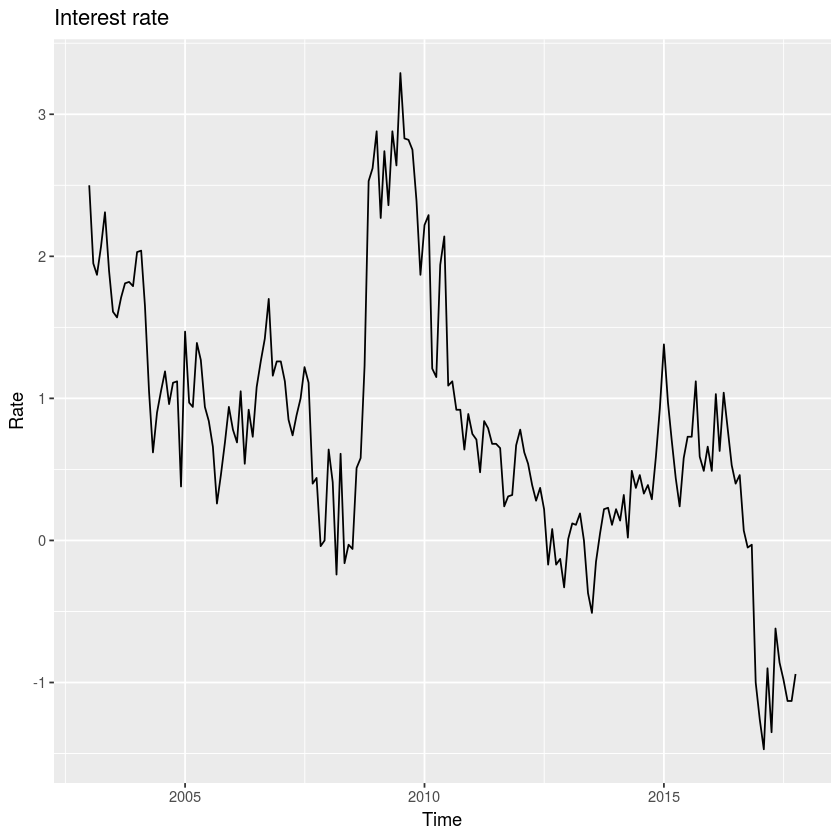

In [41]:
ggplot() + 
  geom_line(data = df, aes(x = date, y = rate)) +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Interest rate")

#### (a) Check the ACF and decide about the strength of the memory in the time series using Box-Ljung/Pierce tests.

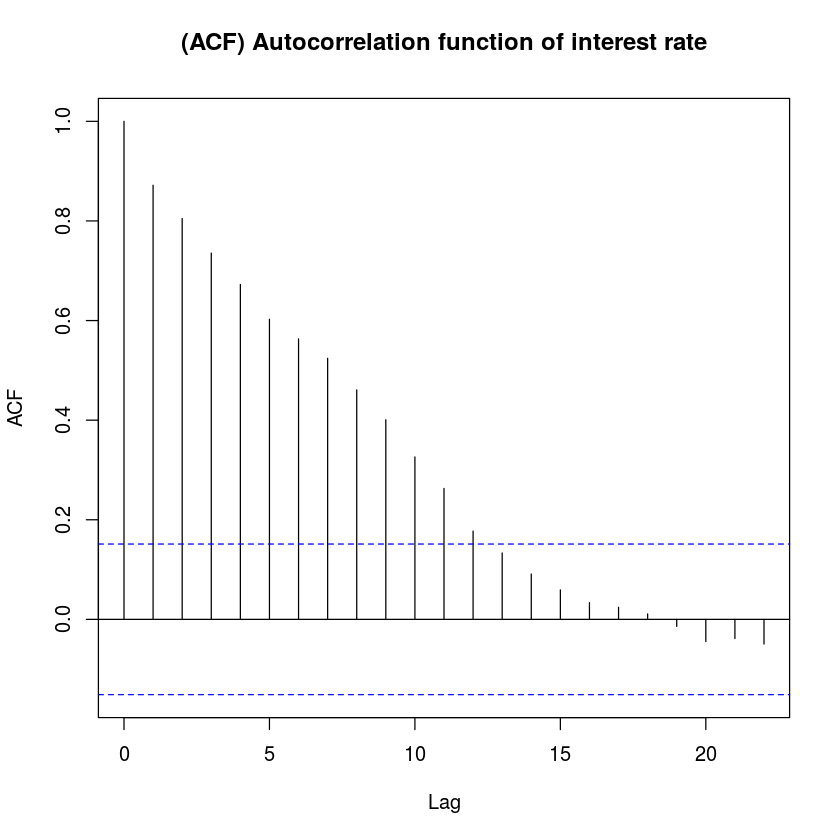

In [42]:
df_train <- ts(df$rate[1:168], start = c(2003, 1), frequency = 12)
df_test <- ts(df$rate[169:178], start = c(2017, 1), frequency = 12)
acf_d <- acf(as.vector(df_train), plot = FALSE)
plot(acf_d, main = "(ACF) Autocorrelation function of interest rate")

It can be observed that ACF plot has 12 significant correlations. Let's check this statistically.

If model has no memory then all the autocorrelation at lag $k\in(1,m)$ whould be appproximately equal to zero:

$\rho_k\approx 0$

Thus, we can check the significance of the memory using Portmanteau-tests of Box/Pierce and and Box/Ljung:

$H_0$: the process is not autocorrelated, i.e. $\rho_1 = \cdots = \rho_m = 0$.

$H_1$: the process is autocorrelated, i.e. $\rho_i \ne 0$ for at least one $i$.

Test statistics:

$$Q = \tau\sum_{h=1}^m\hat{\rho}^2_h \qquad \text{(Box-Pierce)}$$

$$Q^* = \tau(\tau+2)\sum_{h=1}^m\frac{\hat{\rho_h^2}}{\tau - h} \qquad \text{(Box-Ljung)}$$

We reject the null hypothesis if $Q$ or $Q*$ is greater than $\chi_{1-\alpha;m}^2$.

##### Box-Pierce test:


In [43]:
Box.test(df_train, lag=20, type="Box-Pierce");


	Box-Pierce test

data:  df_train
X-squared = 666.8, df = 20, p-value < 2.2e-16


##### Box-Ljung test:

In [44]:
Box.test(df_train, lag=20, type="Ljung-Box");


	Box-Ljung test

data:  df_train
X-squared = 692.56, df = 20, p-value < 2.2e-16


Both p-values are 2.2e-16<< 0.05. Thus we can reject the null hypothesis and conclude that the memory is $highly-highly$ significant and it makes sense to model it.

#### (b) Try MA(1), AR(1) and ARMA(1,1) processes and check the fit (ACF of residuals, AIC, etc.)

In [45]:
MA1 <- arima(df_train, order = c(0,0,1))
MA1_forecast <- forecast(MA1, 10)
MA1_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(MA1_forecast$mean))

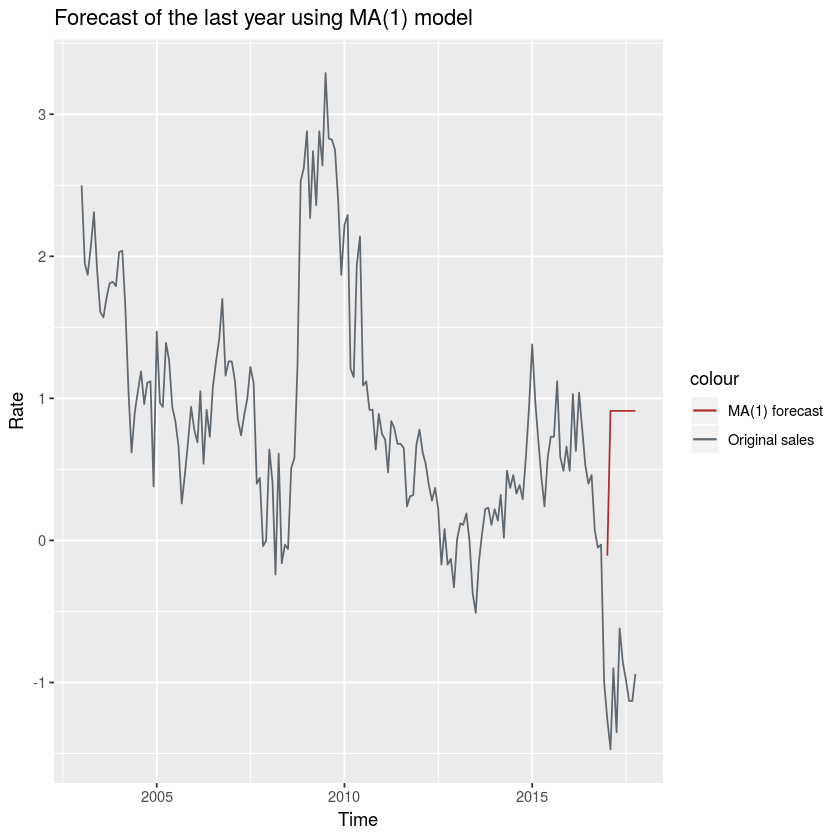

In [46]:
ggplot() + 
  geom_line(data=df, aes(x = date, y = rate, color = 'Original sales')) +
  geom_line(data = MA1_predictions, aes(x = date, y = val, color = 'MA(1) forecast')) +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast of the last year using MA(1) model")+
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"MA(1) forecast"="#ae3131"))


In [47]:
AR1 <- arima(df_train, order = c(1,0,0))
AR1_forecast <- forecast(AR1, 10)
AR1_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(AR1_forecast$mean))
AR1


Call:
arima(x = df_train, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.9173     0.8938
s.e.  0.0335     0.3108

sigma^2 estimated as 0.1255:  log likelihood = -64.99,  aic = 135.97

the estimated parameter of the AR(1) process is always |α̂ 1 | < 1 indicating a stationary process.

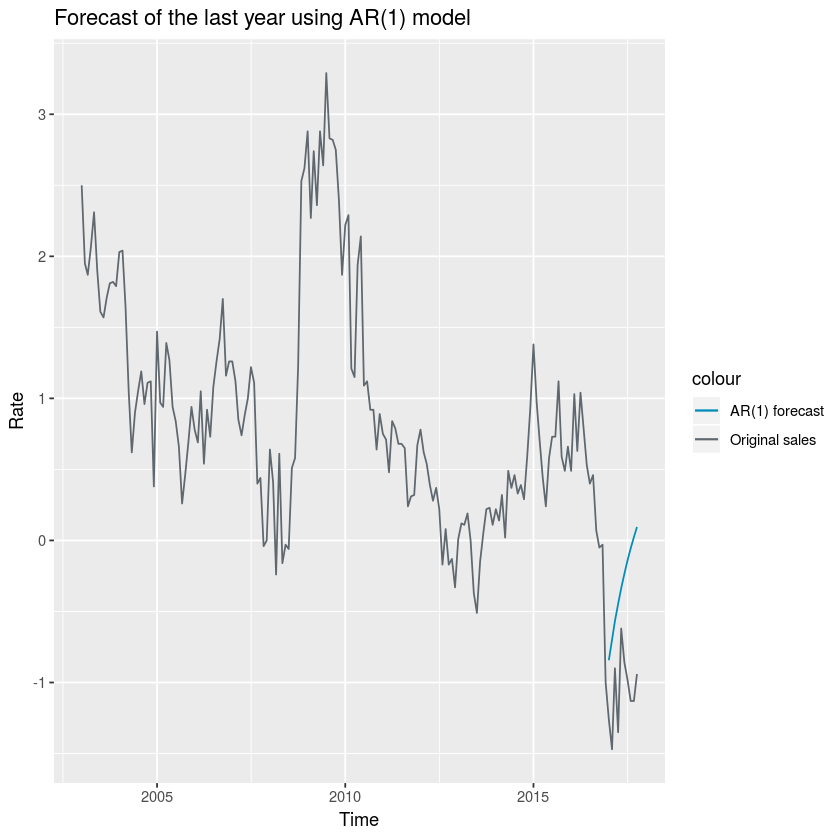

In [48]:
ggplot() + 
  geom_line(data=df, aes(x = date, y = rate, color = 'Original sales')) +
  geom_line(data = AR1_predictions, aes(x = date, y = val, color = 'AR(1) forecast')) +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast of the last year using AR(1) model")+
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"AR(1) forecast"="#008db9"))


#"EWMA"="#549c0e", "Holt"="#008db9", "HoltWinters"="#ae3131"

In [49]:
ARMA11 <- arima(df_train, order = c(1,0,1))
ARMA11_forecast <- forecast(ARMA11, 10)
ARMA11_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(ARMA11_forecast$mean)) 
ARMA11


Call:
arima(x = df_train, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.9451  -0.1630     0.8884
s.e.  0.0300   0.0828     0.3761

sigma^2 estimated as 0.1227:  log likelihood = -63.14,  aic = 134.27

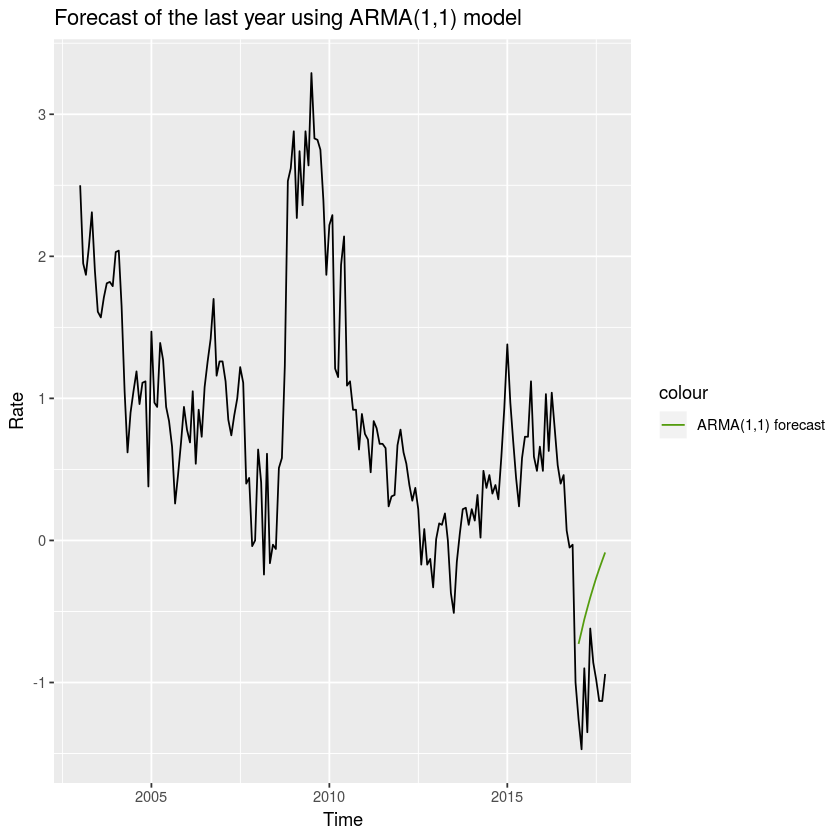

In [50]:
ggplot(df, aes(x = date, y = rate)) + 
  geom_line() +
  geom_line(data = ARMA11_predictions, aes(x = date, y = val, color = 'ARMA(1,1) forecast'))  +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast of the last year using ARMA(1,1) model") +
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"ARMA(1,1) forecast"="#549c0e"))

#"EWMA"="#549c0e", "Holt"="#008db9", "HoltWinters"="#ae3131"

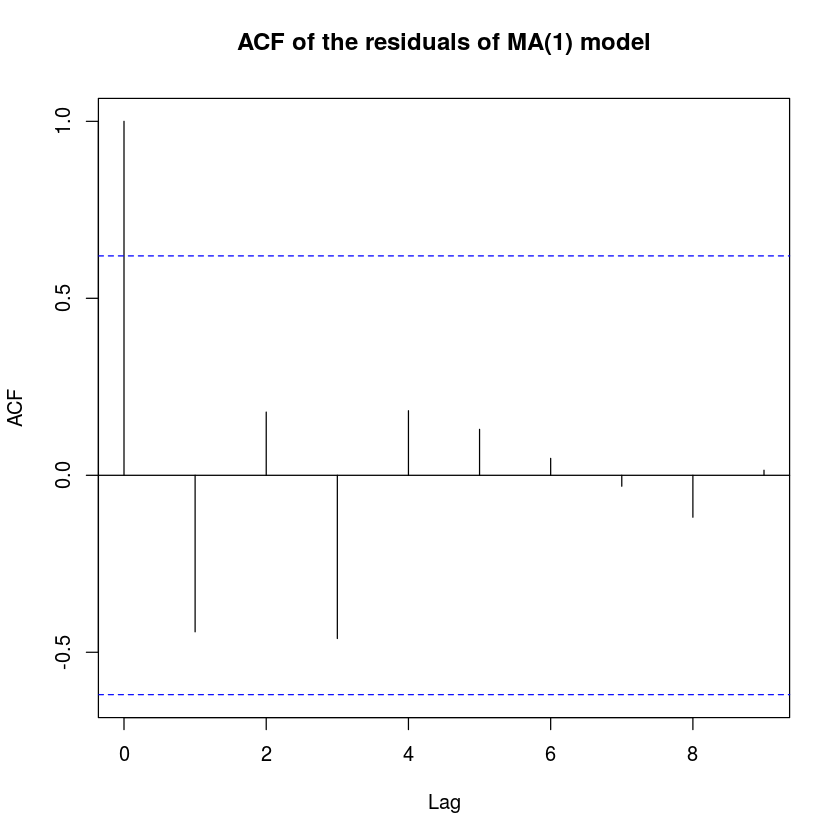

In [51]:
MA1_acf <- acf(as.vector(MA1_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(MA1_acf, main = "ACF of the residuals of MA(1) model")

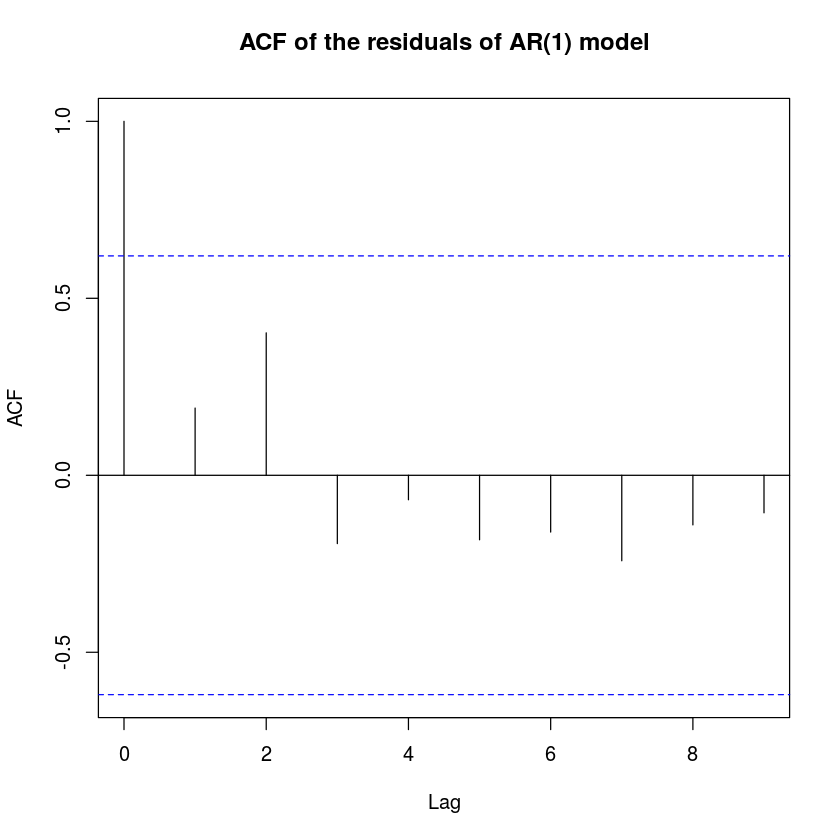

In [52]:
AR1_acf <- acf(as.vector(AR1_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(AR1_acf, main = "ACF of the residuals of AR(1) model")

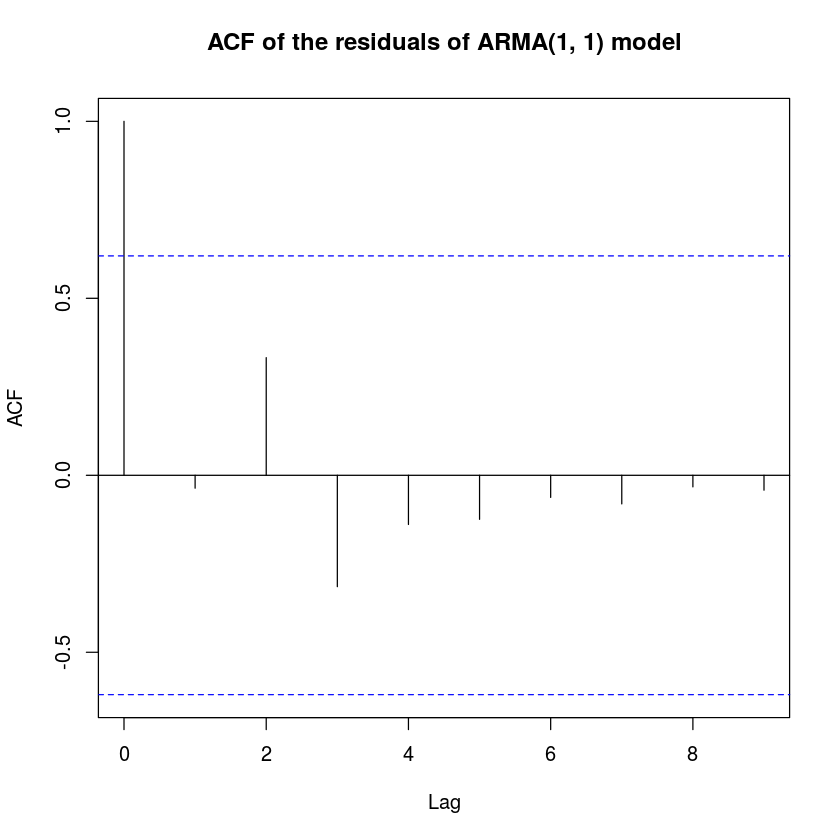

In [53]:
ARMA11_acf <- acf(as.vector(ARMA11_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(ARMA11_acf, main = "ACF of the residuals of ARMA(1, 1) model")

In [54]:
AIC(MA1)

[1] 287.926

In [55]:
AIC(AR1)

[1] 135.9717

In [56]:
AIC(ARMA11)

[1] 134.271



#### (c) Try differencing and subsequent application of MA(1), AR(1) and ARMA(1,1). Check again the processes and check the fit (significance, ACF, AIC, etc.) Decide which model is the best one.

Non-stationary process should be transformed to a stationary one or the model should allow for non-stationarity -> integrated processes

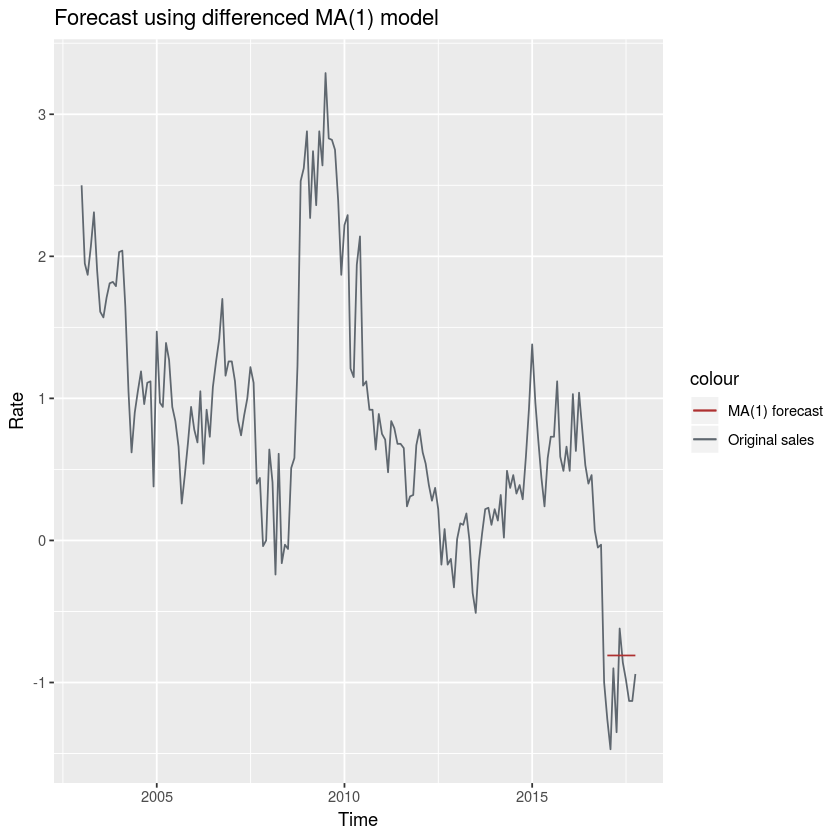

In [57]:
diff_MA1 <- arima(df_train, order = c(0,1,1))
diff_MA1_forecast <- forecast(diff_MA1, 10)
diff_MA1_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(diff_MA1_forecast$mean))

ggplot() + 
  geom_line(data=df, aes(x = date, y = rate, color="Original sales")) +
  geom_line(data = diff_MA1_predictions, aes(x = date, y = val, color = 'MA(1) forecast'))  +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast using differenced MA(1) model")+
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"MA(1) forecast"="#ae3131"))


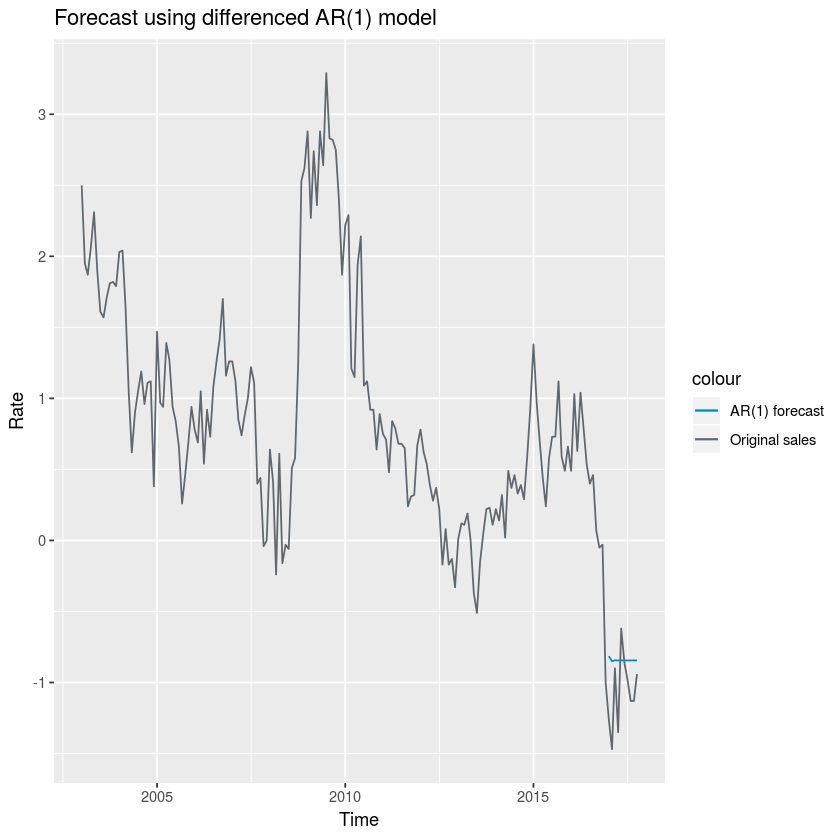

In [58]:
diff_AR1 <- arima(df_train, order = c(1,1,0))
diff_AR1_forecast <- forecast(diff_AR1, 10)
diff_AR1_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(diff_AR1_forecast$mean))

ggplot() + 
  geom_line(data=df, aes(x = date, y = rate, color="Original sales")) +
  geom_line(data = diff_AR1_predictions, aes(x = date, y = val, color = 'AR(1) forecast'))  +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast using differenced AR(1) model")+
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"AR(1) forecast"="#008db9"))


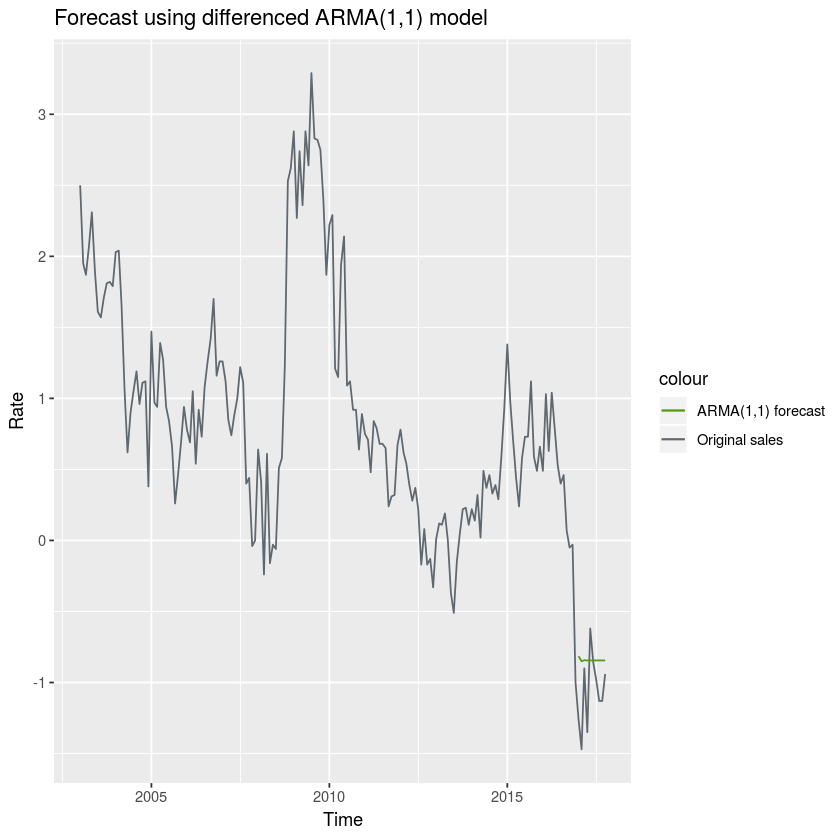

In [59]:
diff_ARMA11 <- arima(df_train, order = c(1,1,1))
diff_ARMA11_forecast <- forecast(diff_ARMA11, 10)
diff_ARMA11_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(diff_AR1_forecast$mean))

ggplot() + 
  geom_line(data=df, aes(x = date, y = rate, color="Original sales")) +
  geom_line(data = diff_ARMA11_predictions, aes(x = date, y = val, color = 'ARMA(1,1) forecast'))  +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast using differenced ARMA(1,1) model")+
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"ARMA(1,1) forecast"="#549c0e"))

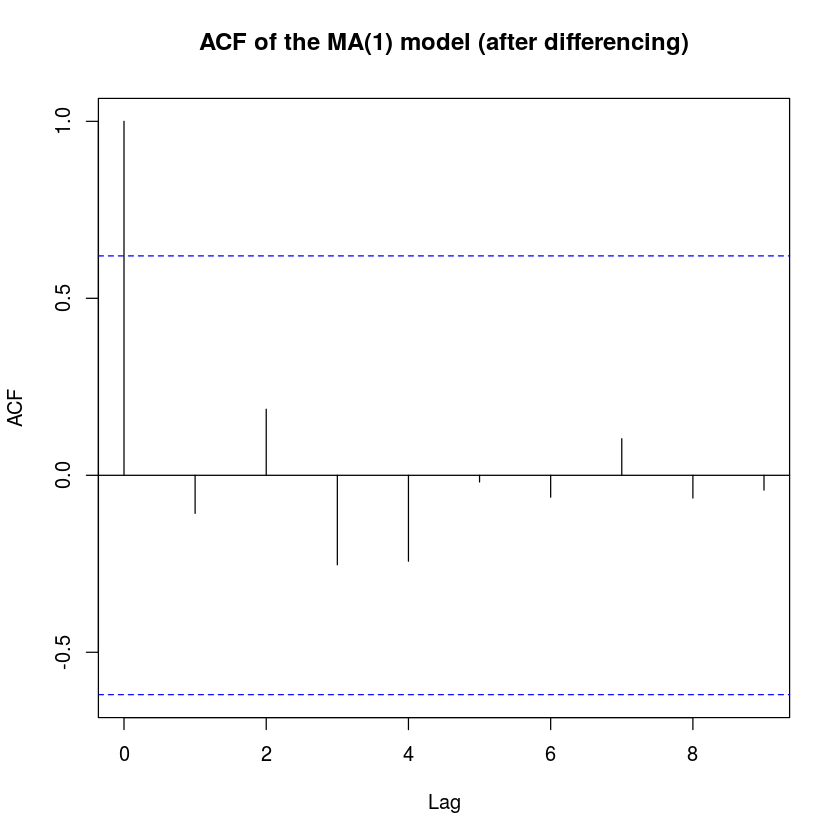

In [60]:
diff_MA1_acf <- acf(as.vector(diff_MA1_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(diff_MA1_acf, main = "ACF of the MA(1) model (after differencing)")

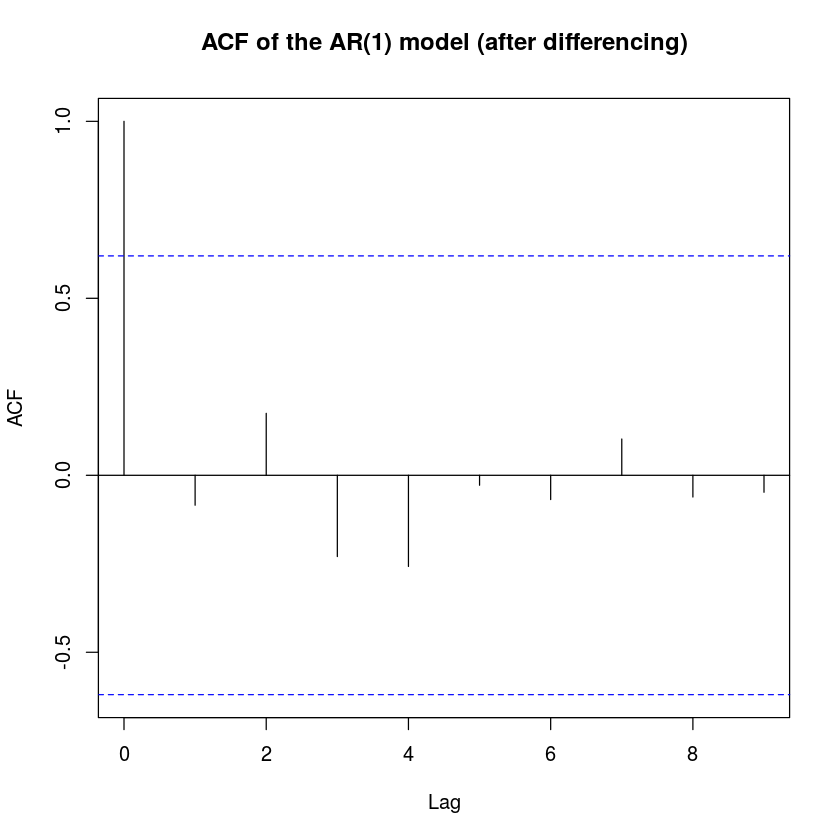

In [61]:
diff_AR1_acf <- acf(as.vector(diff_AR1_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(diff_AR1_acf, main = "ACF of the AR(1) model (after differencing)")

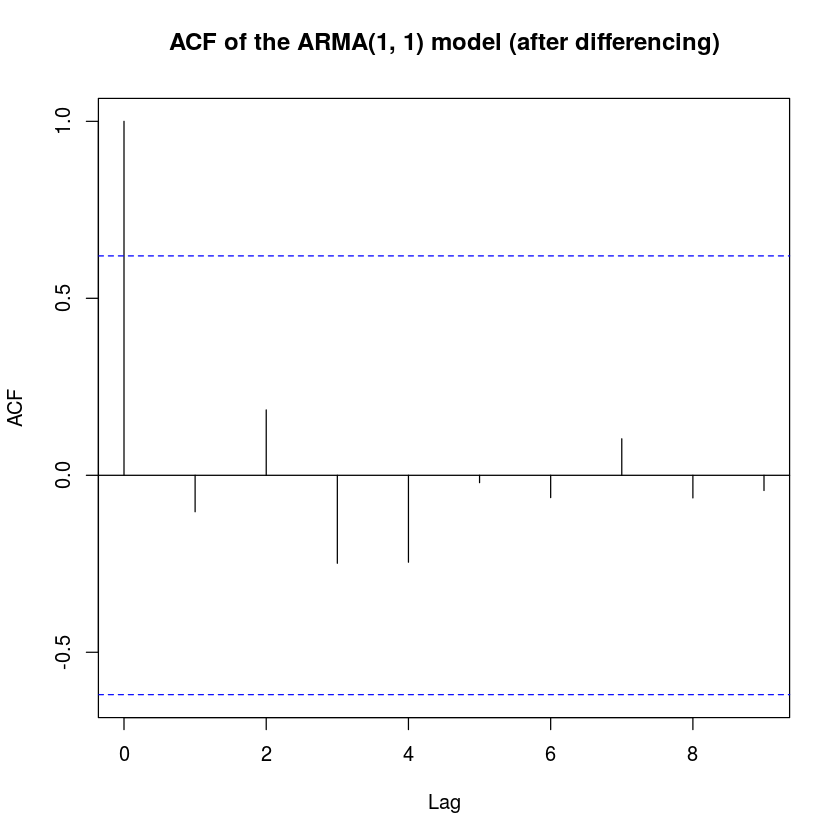

In [62]:
diff_ARMA11_acf <- acf(as.vector(diff_ARMA11_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(diff_ARMA11_acf, main = "ACF of the ARMA(1, 1) model (after differencing)")

In [63]:
AIC(diff_MA1)

[1] 130.9265

In [64]:
AIC(diff_AR1)

[1] 131.0272

In [65]:
AIC(diff_ARMA11)

[1] 132.9219

After differencing the model MA(1) has the smallest AIC value and becomes the best model of those three 

#### (d) Try autoarima (in R) and compare the final model with the one you found in the previous step.

In [66]:
auto_arima <- auto.arima(df_train, trace = TRUE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2)(1,0,1)[12] with drift         : 137.1169
 ARIMA(0,1,0)            with drift         : 138.4542
 ARIMA(1,1,0)(1,0,0)[12] with drift         : 133.8128
 ARIMA(0,1,1)(0,0,1)[12] with drift         : 126.1716
 ARIMA(0,1,0)                               : 136.9715
 ARIMA(0,1,1)            with drift         : 134.4055
 ARIMA(0,1,1)(1,0,1)[12] with drift         : 133.846
 ARIMA(0,1,1)(0,0,2)[12] with drift         : 127.8978
 ARIMA(0,1,1)(1,0,0)[12] with drift         : 132.9545
 ARIMA(0,1,1)(1,0,2)[12] with drift         : 134.5601
 ARIMA(0,1,0)(0,0,1)[12] with drift         : 130.861
 ARIMA(1,1,1)(0,0,1)[12] with drift         : 126.0845
 ARIMA(1,1,1)            with drift         : 135.1017
 ARIMA(1,1,1)(1,0,1)[12] with drift         : 137.0204
 ARIMA(1,1,1)(0,0,2)[12] with drift         : 127.9759
 ARIMA(1,1,1)(1,0,0)[12] with drift         : 135.8132
 ARIMA(1,1,1)(1,0,2)[12] with drift         : 136.5653
 ARIMA

The best model is differenced $AR(1)$ with $ seasonality$(P=0,D=0,Q=1) and $period$=12.

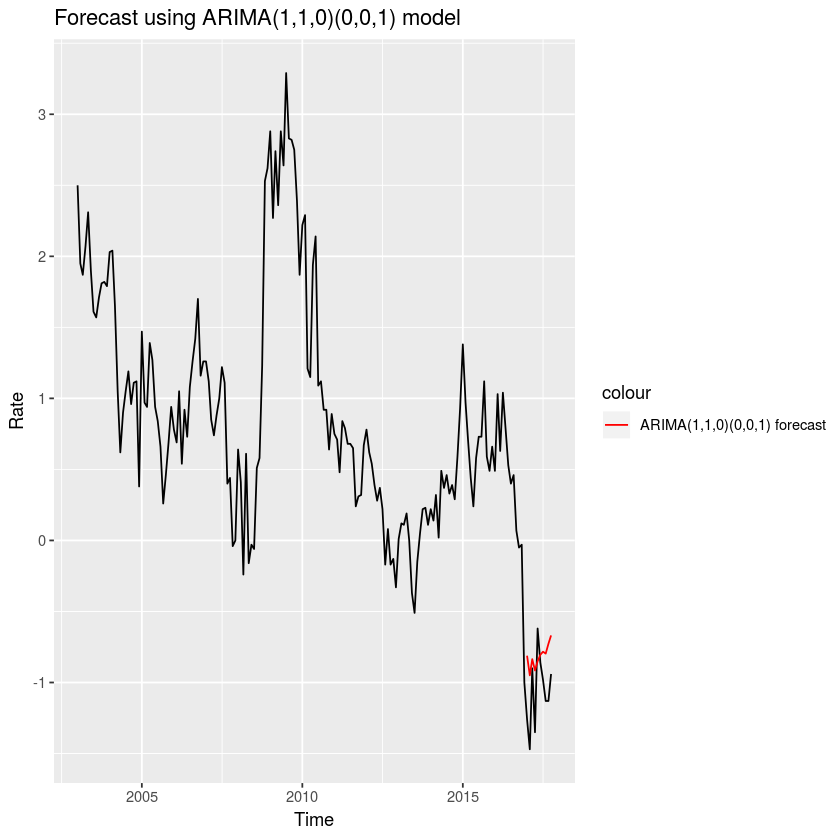

In [67]:
auto_arima_forecast <- forecast(auto_arima, 10)
auto_arima_predictions <- data.frame(date = df$date[169:length(df$date)], val = as.vector(auto_arima_forecast$mean)) 

ggplot(df, aes(x = date, y = rate)) + 
  geom_line() +
  geom_line(data = auto_arima_predictions, aes(x = date, y = val, color = 'ARIMA(1,1,0)(0,0,1) forecast')) +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast using ARIMA(1,1,0)(0,0,1) model")+
  scale_colour_manual(values = c("Original sales"="#5f676f" ,"ARIMA(1,1,0)(0,0,1) forecast"="red"))

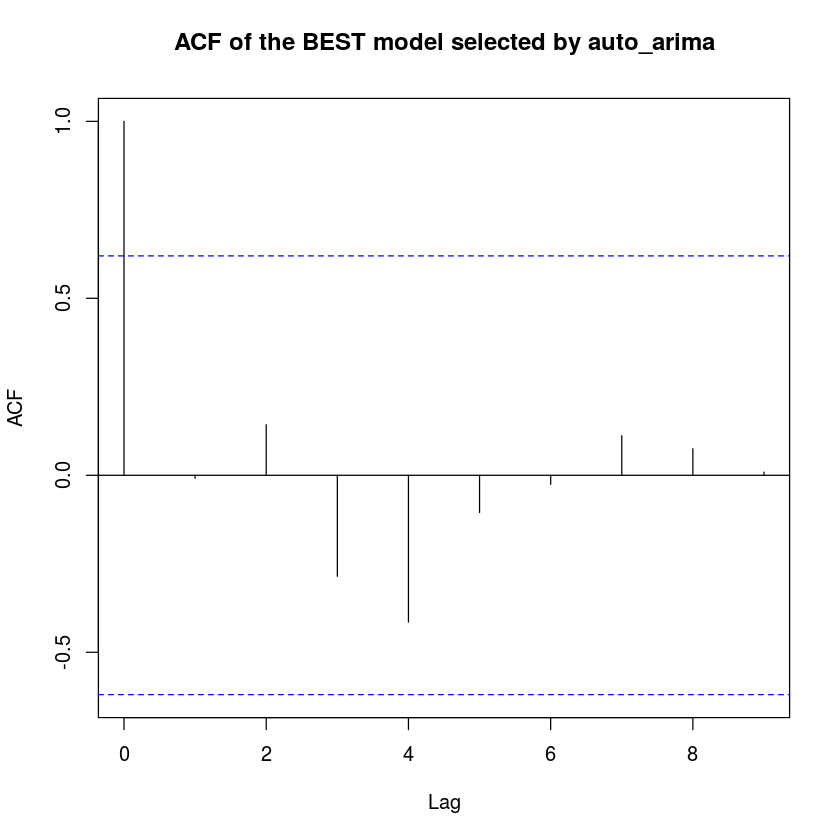

In [68]:
auto_arima_acf <- acf(as.vector(auto_arima_forecast$mean -  as.vector(df_test)), plot = FALSE)
plot(auto_arima_acf, main = "ACF of the BEST model selected by auto_arima")

In [69]:
AIC(diff_MA1)

[1] 130.9265

In [70]:
AIC(auto_arima)

[1] 123.7007

With regard to the AIC criterion we can conclude that model SARIMA(1,1,0)(0,0,1)[12] selected by the auto-arma (in R) is the better model for our data. This makes sense because we have monthly interest rate for bank deposits and this model captures seasonality.

#### (e) Compute the forecasts and forecast intervals using the final model.

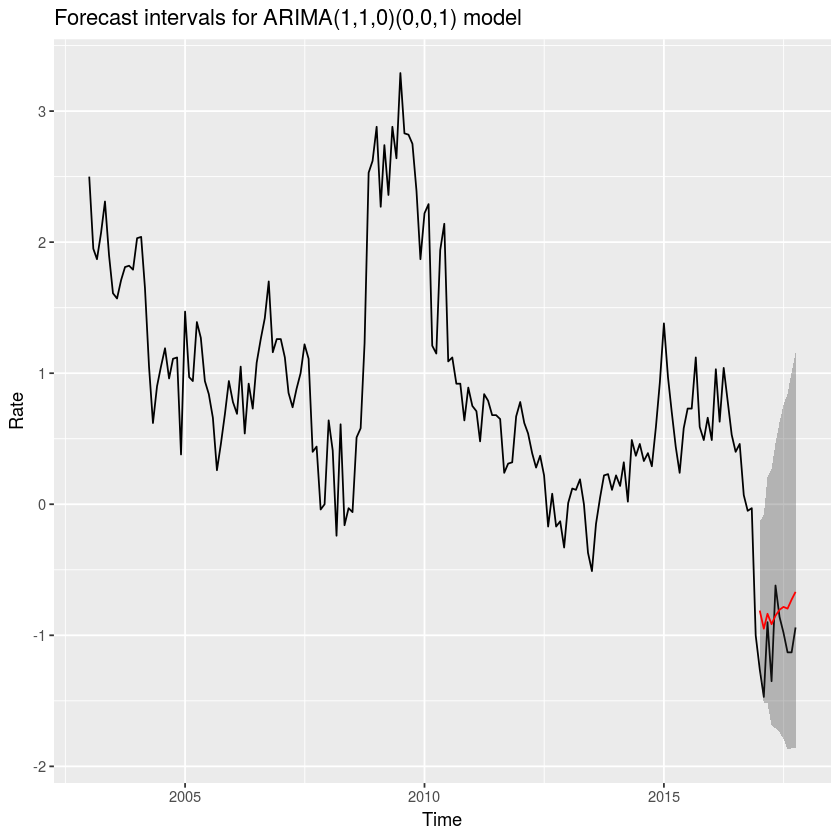

In [71]:
auto_arima_intervals <- data.frame(date = df$date[169:length(df$date)], lw = auto_arima_forecast$lower[,1], up = auto_arima_forecast$upper[, 2])

ggplot(df, aes(x = date)) + 
  geom_line(aes(y = rate)) +
  geom_ribbon(data = auto_arima_intervals, aes(x = date, ymin = lw, ymax = up), fill = 'gray20', alpha = 0.3) +
  geom_line(data = auto_arima_predictions, aes(x = date, y = val), color = 'red') +
  ylab("Rate") +
  xlab("Time") +
  ggtitle("Forecast intervals for ARIMA(1,1,0)(0,0,1) model")

#### (f) Explain why multi-step-ahead forecasts have wider forecast intervals than one-step-ahead-forecasts.

Mathematically,the increase in width of the forecast interval is related to the increasing with $h$ of the standard deviation $\sigma_h$ of the $h$-step forecast distribution. 

The further ahead we forecast, the more uncertain the forecast is, and thus the wider the forecast interval is. 

If to assume that the process we deal with is already stationar then the longer random walk is, the more alternative ways it has

#### (g) Imagine an ACF with only the first two correlations being significant. Which process is suitable to model this and why?

It’s hard to tell only from ACF plot what kind of model would work better for a given time series. We need to have a PACF as well, to make a reasonable decision regarding the model parameters. But in general if we observe that values in ACF plot fall sharply at lag 2, then it makes sense to calculate the weighted average of two last forecasts errors and not take into account any other previous term. This set of parameters correspods to MA(2) model.

#### (h) Imagine an ACF which consists only of positive values and quickly decays towards zero. Which process is suitable to model this and why?

Same as in previous question, it's hard to tell only from ACF plot which model to use for forecasting.We need to have a PACF as well, to make a reasonable decision regarding the model parameters. It may be useful to use an AR(k) model where k is equal to the lag of significant values in ACF.

#### (i) Consider an AR(1) process with parameter $\alpha_1$ . Assume we have a shock to a time series (a large error term, unexpected event) at the time point t = 10. Which impact do you expect this shock to have on the observation at time point t = 15? Provide the formula and give formal motivation.

$\hat{Y}_{15} = u_{15} + \alpha_1* Y_{14}$

$\hat{Y}_{15} = u_{15} + \alpha_1(u_{14} + \alpha_1*Y_{13})$

$\hat{Y}_{15} = u_{15} + \alpha_1(u_{14} + \alpha_1(u_{13} + \alpha_1(u_{12} + \alpha_1(u_{11} + \alpha_1*Y_{10}))))$

$\hat{Y}_{15} = u_{15} + \alpha_1*u_{14} + \alpha_1^2*u_{13} + \alpha_1^3*u_{12} + \alpha_1^4*u_{11} + \alpha_1^5*Y_{10}$

So, at point time t=15 this unexpected shock in t=10 would change $Y_15$ on  $\alpha_1^5*Y_{10} => \alpha_1^5*u_{10}=$ where $u_{10}$ is this large error term.

### 2. Simple forecasting and forecasting with exponential smoothing of the crude oil price.

Data: crude oil price per barrel; (Source: Federal Reserve Bank of St. Louis, file: CrudeOil.csv)


In [72]:
library(zoo)
library(xts)



Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [73]:
df <- read.csv(file = 'CrudeOil.csv')
names(df) <- c('date', 'rate')
df$date <- as.Date(df$date)
df <- na.locf(df, fromLast = TRUE)

#### (a) By just looking at the time series identify the phases when the naive forecast can outperform the alternatives and intervals where exponential smoothing is potentially better. Motivate your decision.

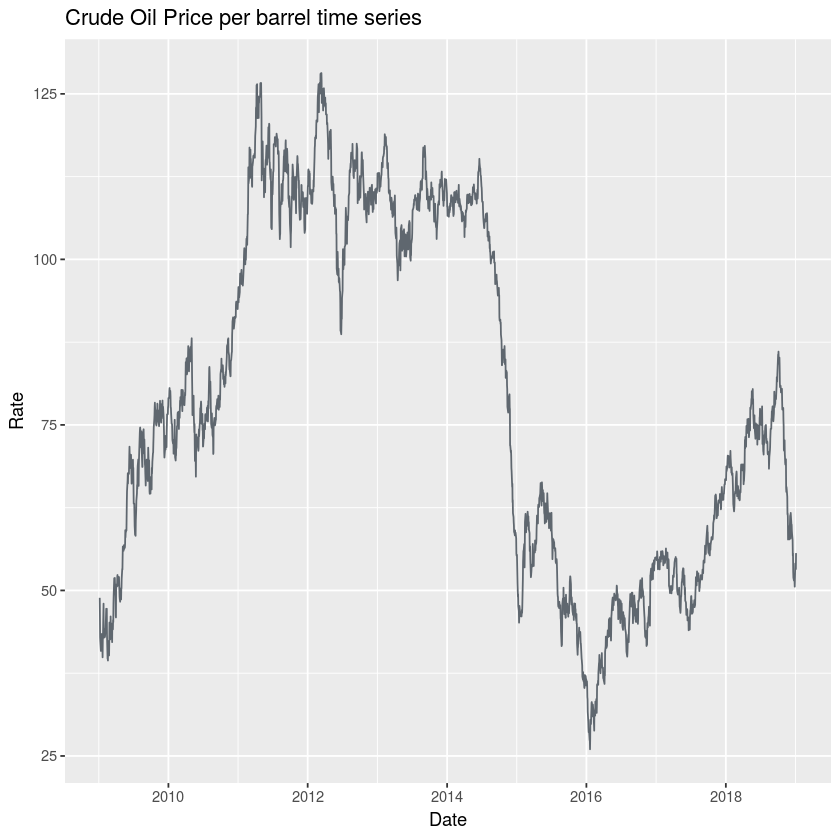

In [74]:
ggplot() + 
  geom_line(data= df, aes(x = date, y = rate), color="#5f676f") +
  ylab("Rate") +
  xlab("Date") +
  ggtitle("Crude Oil Price per barrel time series")

Naive forecast and simple exponential smoothing for multy-head predictions would outperform exponential smoothing during the phases of price stability. Becasue $Ŷ_{t+k}=Ŷ_{t+1} = Y_t$ takes only simple value of Y in some previous point into aacount from the February 2011 to June 2014 .

Holt forecast  can be potentially better on intervals with systematic trend. We can observe two such intervals in the time series: January 2009 to December 2011 and January 2016 to October 2019. 

#### (b) Split the time series into three phases using the observations [1;600]; [600;1400] and [1500;end]. For each phase do the following (use the first 200 observations to calibrate the model if needed):

In [75]:
df_phase1 <- df[1:600,]
df_phase2 <- df[601:1500,]
df_phase3 <- df[1501:length(df$rate),]

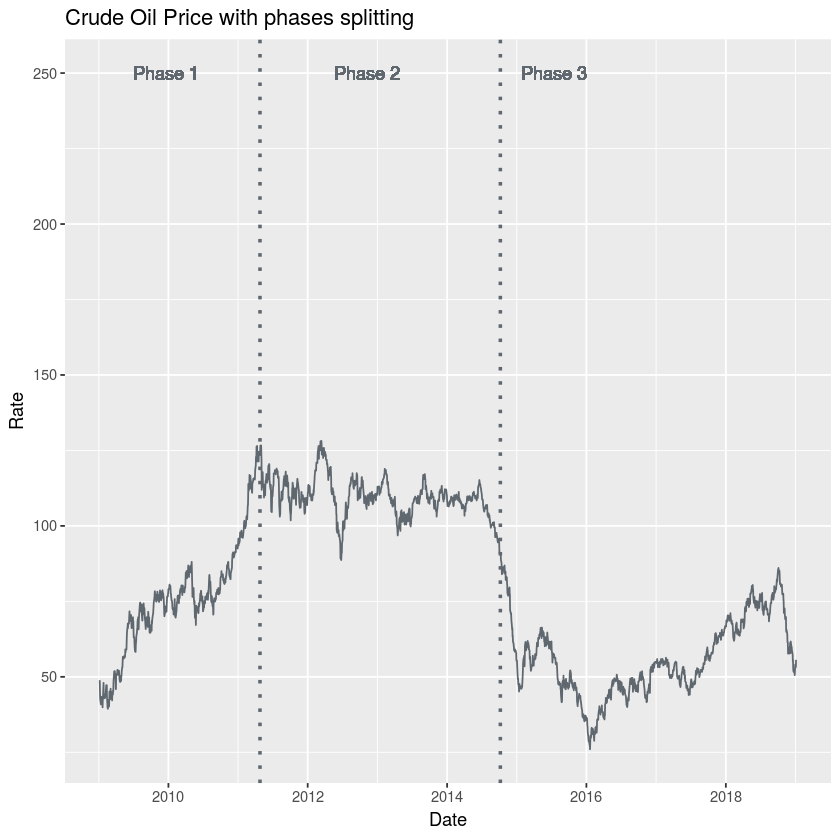

In [76]:
ggplot(df, aes(x = date, y = rate)) +
geom_line(color='#5f676f') +
ggtitle('Crude Oil Price with phases splitting') +
geom_vline(xintercept = as.Date(df$date[601]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[250]), y = 250, label = 'Phase 1'), angle = 0, color = '#5f676f') +
geom_vline(xintercept = as.Date(df$date[1501]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[1000]), y = 250, label = 'Phase 2'), angle = 0, color = '#5f676f') +
geom_text(aes(x = as.Date(df$date[1700]), y = 250, label = 'Phase 3'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Rate') 

##### i. Compute simple one-step-ahead forecasts for the test data set using naive, absolute trend and relative trend methods.

In [77]:
naive_phase_1_forecast <- naive(df_phase1$rate[1:200], length(df_phase1$rate) - 200)
naive_phase_1_values <- data.frame(date = df_phase1$date[201:length(df_phase1$date)], val = as.vector(naive_phase_1_forecast$mean))

naive_phase_2_forecast <- naive(df_phase2$rate[1:200], length(df_phase2$rate) - 200)
naive_phase_2_values <- data.frame(date = df_phase2$date[201:length(df_phase2$date)], val = as.vector(naive_phase_2_forecast $mean))

naive_phase_3_forecast <- naive(df_phase3$rate[1:200], length(df_phase3$rate) - 200)
naive_phase_3_values <- data.frame(date = df_phase3$date[201:length(df_phase3$date)], val = as.vector(naive_phase_3_forecast $mean))


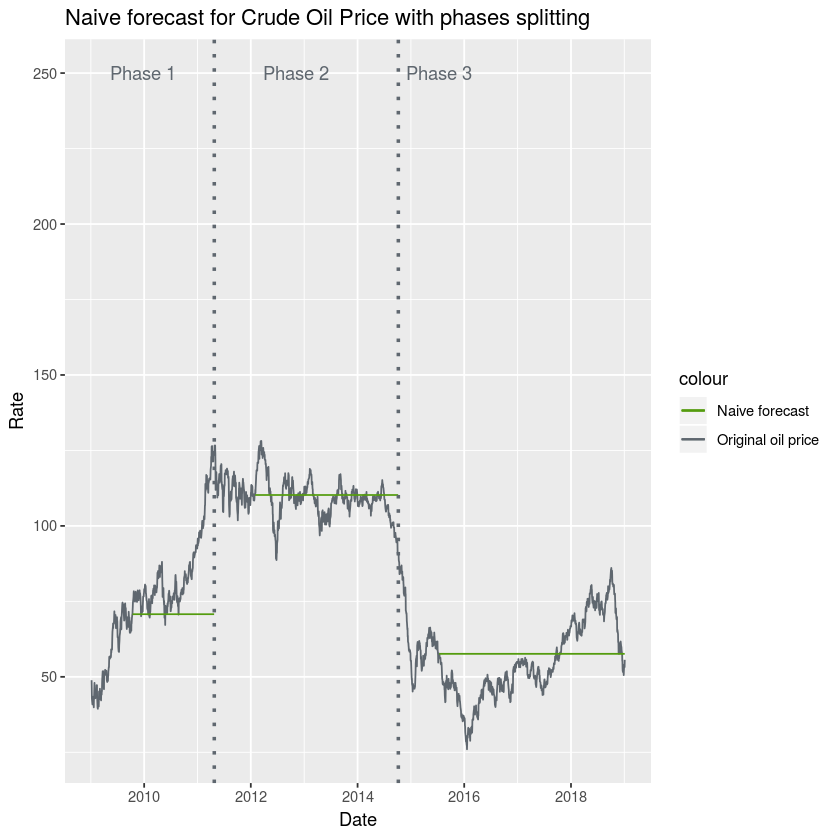

In [78]:
ggplot() +
geom_line(data=df, aes(x = date, y = rate, color = 'Original oil price')) +
geom_line(data = naive_phase_1_values, aes(x = date, y = val, color = 'Naive forecast')) +
geom_line(data = naive_phase_2_values, aes(x = date, y = val, color = 'Naive forecast')) +
geom_line(data = naive_phase_3_values, aes(x = date, y = val, color = 'Naive forecast')) +
ggtitle('Naive forecast for Crude Oil Price with phases splitting') +
geom_vline(xintercept = as.Date(df$date[601]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[250]), y = 250, label = 'Phase 1'), angle = 0, color = '#5f676f') +
geom_vline(xintercept = as.Date(df$date[1501]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[1000]), y = 250, label = 'Phase 2'), angle = 0, color = '#5f676f') +
geom_text(aes(x = as.Date(df$date[1700]), y = 250, label = 'Phase 3'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Rate') +
scale_colour_manual(values = c("Original oil price"="#5f676f" ,"Naive forecast"="#549c0e"))

In [79]:
naive_at_phase_1_values <- data.frame(date = df_phase1$date[201:length(df_phase1$date)], val = rep(df_phase1$rate[200] + (df_phase1$rate[200] - df_phase1$rate[199]), length(df_phase1$rate) - 200))
naive_at_phase_2_values <- data.frame(date = df_phase2$date[201:length(df_phase2$date)], val = rep(df_phase2$rate[200] + (df_phase2$rate[200] - df_phase2$rate[199]), length(df_phase2$rate) - 200))
naive_at_phase_3_values <- data.frame(date = df_phase3$date[201:length(df_phase3$date)], val = rep(df_phase3$rate[200] + (df_phase3$rate[200] - df_phase3$rate[199]), length(df_phase3$rate) - 200))

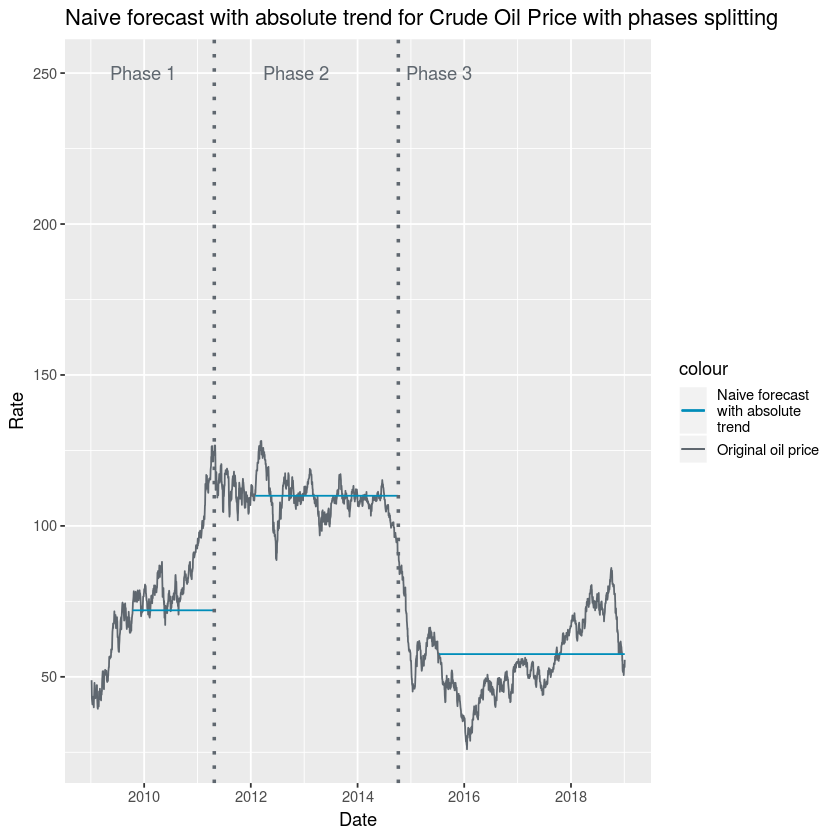

In [80]:
ggplot() +
geom_line(data=df, aes(x = date, y = rate, color = 'Original oil price')) +
geom_line(data = naive_at_phase_1_values, aes(x = date, y = val, color = 'Naive forecast\nwith absolute\ntrend')) +
geom_line(data = naive_at_phase_2_values, aes(x = date, y = val, color = 'Naive forecast\nwith absolute\ntrend')) +
geom_line(data = naive_at_phase_3_values, aes(x = date, y = val, color = 'Naive forecast\nwith absolute\ntrend')) +
ggtitle('Naive forecast with absolute trend for Crude Oil Price with phases splitting') +
geom_vline(xintercept = as.Date(df$date[601]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[250]), y = 250, label = 'Phase 1'), angle = 0, color = '#5f676f') +
geom_vline(xintercept = as.Date(df$date[1501]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[1000]), y = 250, label = 'Phase 2'), angle = 0, color = '#5f676f') +
geom_text(aes(x = as.Date(df$date[1700]), y = 250, label = 'Phase 3'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Rate') +
scale_colour_manual(values = c("Original oil price"="#5f676f" ,"Naive forecast\nwith absolute\ntrend"="#008db9"))

In [81]:
naive_rt_phase_1_values <- data.frame(date = df_phase1$date[201:length(df_phase1$date)], val = rep(df_phase1$rate[200] * df_phase1$rate[200] / df_phase1$rate[199], length(df_phase1$rate) - 200))
naive_rt_phase_2_values <- data.frame(date = df_phase2$date[201:length(df_phase2$date)], val = rep(df_phase2$rate[200] * df_phase2$rate[200] / df_phase2$rate[199], length(df_phase2$rate) - 200))
naive_rt_phase_3_values <- data.frame(date = df_phase3$date[201:length(df_phase3$date)], val = rep(df_phase3$rate[200] * df_phase3$rate[200] / df_phase3$rate[199], length(df_phase3$rate) - 200))

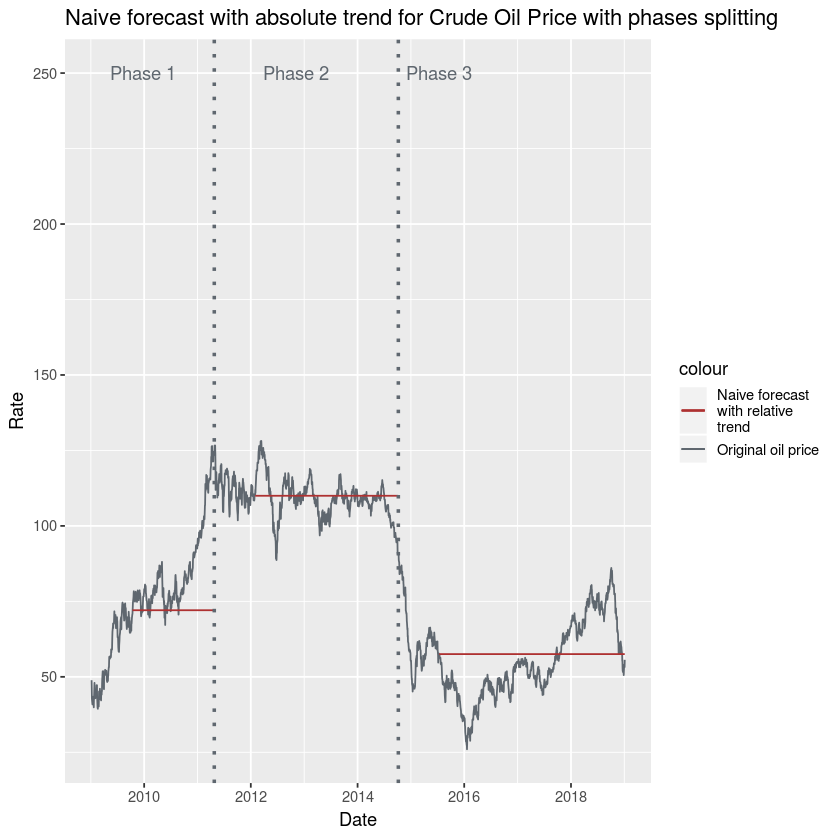

In [82]:
ggplot() +
geom_line(data=df, aes(x = date, y = rate, color = 'Original oil price')) +
geom_line(data = naive_rt_phase_1_values, aes(x = date, y = val, color = 'Naive forecast\nwith relative\ntrend')) +
geom_line(data = naive_rt_phase_2_values, aes(x = date, y = val, color = 'Naive forecast\nwith relative\ntrend')) +
geom_line(data = naive_rt_phase_3_values, aes(x = date, y = val, color = 'Naive forecast\nwith relative\ntrend')) +
ggtitle('Naive forecast with absolute trend for Crude Oil Price with phases splitting') +
geom_vline(xintercept = as.Date(df$date[601]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[250]), y = 250, label = 'Phase 1'), angle = 0, color = '#5f676f') +
geom_vline(xintercept = as.Date(df$date[1501]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[1000]), y = 250, label = 'Phase 2'), angle = 0, color = '#5f676f') +
geom_text(aes(x = as.Date(df$date[1700]), y = 250, label = 'Phase 3'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Rate') +
scale_colour_manual(values = c("Original oil price"="#5f676f" ,"Naive forecast\nwith relative\ntrend"="#ae3131"))

##### ii. Compute simple one-step-ahead forecasts using EWMA and Holt (with optimal smoothing parameters).

In [83]:
df_phase1.ewma <- HoltWinters(df_phase1$rate[1:200], beta = FALSE, gamma = FALSE)
df_phase1.ewma.forecast <- forecast(df_phase1.ewma, length(df_phase1$rate) - 200)
df_phase1.ewma.values <- data.frame(date = df_phase1$date[201:length(df_phase1$date)], val = as.vector(df_phase1.ewma.forecast$mean))

df_phase2.ewma <- HoltWinters(df_phase2$rate[1:200], beta = FALSE, gamma = FALSE)
df_phase2.ewma.forecast <- forecast(df_phase2.ewma, length(df_phase2$rate) - 200)
df_phase2.ewma.values <- data.frame(date = df_phase2$date[201:length(df_phase2$date)], val = as.vector(df_phase2.ewma.forecast$mean))

df_phase3.ewma <- HoltWinters(df_phase3$rate[1:200], beta = FALSE, gamma = FALSE)
df_phase3.ewma.forecast <- forecast(df_phase3.ewma, length(df_phase3$rate) - 200)
df_phase3.ewma.values <- data.frame(date = df_phase3$date[201:length(df_phase3$date)], val = as.vector(df_phase3.ewma.forecast$mean))

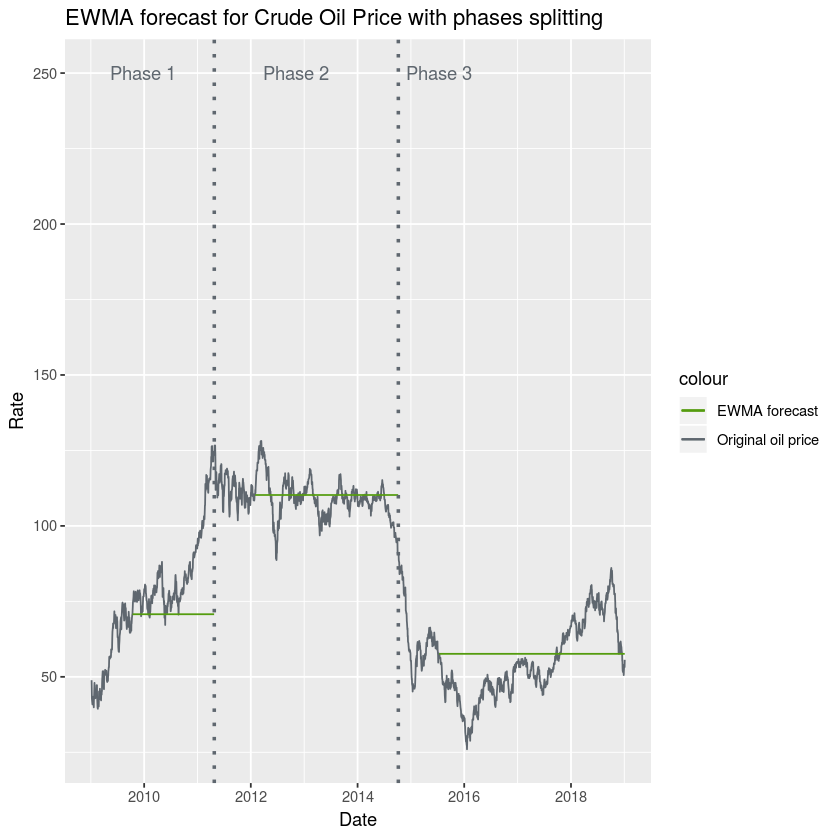

In [84]:
ggplot() +
geom_line(data=df, aes(x = date, y = rate, color = 'Original oil price')) +
geom_line(data = df_phase1.ewma.values, aes(x = date, y = val, color = 'EWMA forecast')) +
geom_line(data = df_phase2.ewma.values, aes(x = date, y = val, color = 'EWMA forecast')) +
geom_line(data = df_phase3.ewma.values, aes(x = date, y = val, color = 'EWMA forecast')) +
ggtitle('EWMA forecast for Crude Oil Price with phases splitting') +
geom_vline(xintercept = as.Date(df$date[601]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[250]), y = 250, label = 'Phase 1'), angle = 0, color = '#5f676f') +
geom_vline(xintercept = as.Date(df$date[1501]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[1000]), y = 250, label = 'Phase 2'), angle = 0, color = '#5f676f') +
geom_text(aes(x = as.Date(df$date[1700]), y = 250, label = 'Phase 3'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Rate') +
scale_colour_manual(values = c("Original oil price"="#5f676f" ,"EWMA forecast"="#549c0e"))

In [85]:
df_phase1.holt <- HoltWinters(df_phase1$rate[1:200], gamma = FALSE)
df_phase1.holt.forecast <- forecast(df_phase1.holt, length(df_phase1$rate) - 200)
df_phase1.holt.values <- data.frame(date = df_phase1$date[201:length(df_phase1$date)], val = as.vector(df_phase1.holt.forecast$mean))

df_phase2.holt <- HoltWinters(df_phase2$rate[1:200], gamma = FALSE)
df_phase2.holt.forecast <- forecast(df_phase2.holt, length(df_phase2$rate) - 200)
df_phase2.holt.values <- data.frame(date = df_phase2$date[201:length(df_phase2$date)], val = as.vector(df_phase2.holt.forecast$mean))

df_phase3.holt <- HoltWinters(df_phase3$rate[1:200], gamma = FALSE)
df_phase3.holt.forecast <- forecast(df_phase3.holt, length(df_phase3$rate) - 200)
df_phase3.holt.values <- data.frame(date = df_phase3$date[201:length(df_phase3$date)], val = as.vector(df_phase3.holt.forecast$mean))


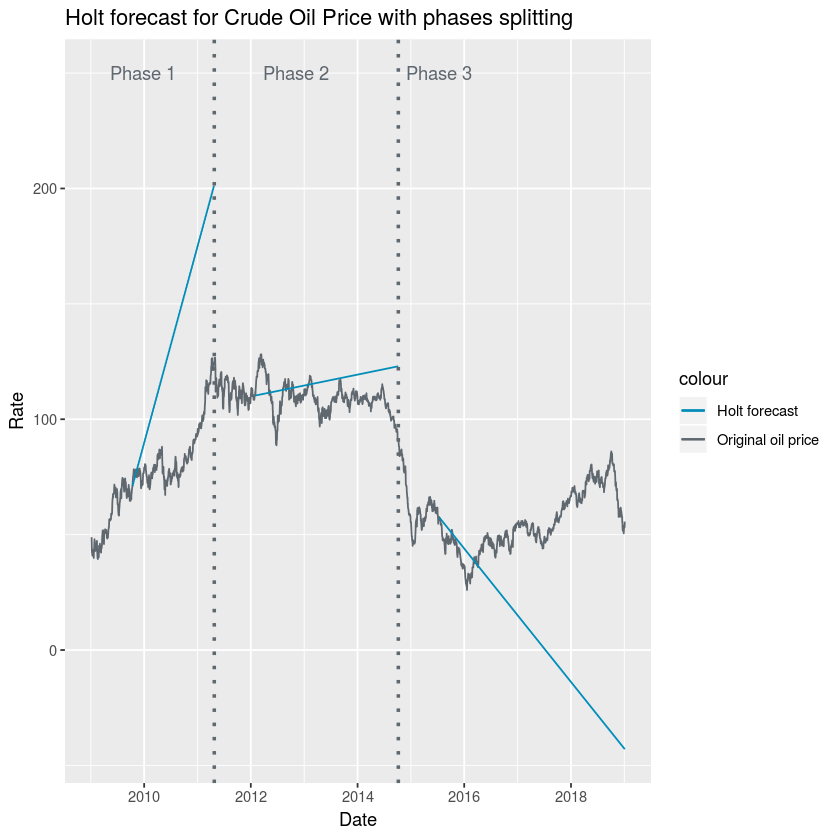

In [86]:
ggplot() +
geom_line(data=df, aes(x = date, y = rate, color = 'Original oil price')) +
geom_line(data = df_phase1.holt.values, aes(x = date, y = val, color = 'Holt forecast')) +
geom_line(data = df_phase2.holt.values, aes(x = date, y = val, color = 'Holt forecast')) +
geom_line(data = df_phase3.holt.values, aes(x = date, y = val, color = 'Holt forecast')) +
ggtitle('Holt forecast for Crude Oil Price with phases splitting') +
geom_vline(xintercept = as.Date(df$date[601]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[250]), y = 250, label = 'Phase 1'), angle = 0, color = '#5f676f') +
geom_vline(xintercept = as.Date(df$date[1501]), linetype="dotted", color = "#5f676f", size=1) +
geom_text(aes(x = as.Date(df$date[1000]), y = 250, label = 'Phase 2'), angle = 0, color = '#5f676f') +
geom_text(aes(x = as.Date(df$date[1700]), y = 250, label = 'Phase 3'), angle = 0, color = '#5f676f') +
xlab('Date') +
ylab('Rate') +
scale_colour_manual(values = c("Original oil price"="#5f676f" ,"Holt forecast"="#008db9"))

##### iii. Compute the MSE, MAE, U and Minzer-Zarnowitz $R^2$ for the time points [201; end].

##### for phase 1

In [87]:
library(forecast)
library(DescTools)


Attaching package: ‘DescTools’

The following object is masked from ‘package:forecast’:

    BoxCox



In [88]:
"Naive:"
" MSE ";sum((naive_phase_1_values$val - df_phase1$rate[201:600])^2)
" MAE ";sum(abs(naive_phase_1_values$val - df_phase1$rate[201:600]))
" U ";TheilU(naive_phase_1_forecast$mean, df_phase1$rate[201:600])
"________________________________________________________________"
"Naive with absolute trend:"
" MSE ";sum((naive_at_phase_1_values$val - df_phase1$rate[201:600])^2)
" MAE ";sum(abs(naive_at_phase_1_values$val - df_phase1$rate[201:600]))
" U ";TheilU(naive_at_phase_1_values$val, df_phase1$rate[201:600])
"________________________________________________________________"
"Naive with relative trend:"
" MSE ";sum((naive_rt_phase_1_values$val - df_phase1$rate[201:600])^2)
" MAE ";sum(abs(naive_rt_phase_1_values$val - df_phase1$rate[201:600]))
" U ";TheilU(naive_rt_phase_1_values$val, df_phase1$rate[201:600])
"________________________________________________________________"
"EWMA forecast:"
" MSE ";sum((df_phase1.ewma.values$val - df_phase1$rate[201:600])^2)
" MAE ";sum(abs(df_phase1.ewma.values$val - df_phase1$rate[201:600]))
" U ";TheilU(df_phase1.ewma.forecast$mean, df_phase1$rate[201:600])
"________________________________________________________________"
"Holt forecast:"
" MSE ";sum((df_phase1.holt.values$val - df_phase1$rate[201:600])^2)
" MAE ";sum(abs(df_phase1.holt.values$val - df_phase1$rate[201:600]))
" U ";TheilU(df_phase1.holt.forecast$mean, df_phase1$rate[201:600])

[1] "Naive:"

[1] " MSE "

[1] 158195.4

[1] " MAE "

[1] 5709.71

[1] " U "

[1] 0.2810868

[1] "________________________________________________________________"

[1] "Naive with absolute trend:"

[1] " MSE "

[1] 144076.9

[1] " MAE "

[1] 5244.61

[1] " U "

[1] 0.2634105

[1] "________________________________________________________________"

[1] "Naive with relative trend:"

[1] " MSE "

[1] 143825.5

[1] " MAE "

[1] 5236.336

[1] " U "

[1] 0.2630918

[1] "________________________________________________________________"

[1] "EWMA forecast:"

[1] " MSE "

[1] 158334

[1] " MAE "

[1] 5714.268

[1] " U "

[1] 0.2812584

[1] "________________________________________________________________"

[1] "Holt forecast:"

[1] " MSE "

[1] 1362746

[1] " MAE "

[1] 20529.15

[1] " U "

[1] 0.4132951

##### for phase2:


In [89]:
"Naive:"
" MSE ";sum((naive_phase_2_values$val - df_phase2$rate[201:900])^2)
" MAE ";sum(abs(naive_phase_2_values$val - df_phase2$rate[201:900]))
" U ";TheilU(naive_phase_2_forecast$mean, df_phase2$rate[201:900])
"________________________________________________________________"
"Naive with absolute trend:"
" MSE ";sum((naive_at_phase_2_values$val - df_phase2$rate[201:900])^2)
" MAE ";sum(abs(naive_at_phase_2_values$val - df_phase2$rate[201:900]))
" U ";TheilU(naive_at_phase_2_values$val, df_phase2$rate[201:900])
"________________________________________________________________"
"Naive with relative trend:"
" MSE ";sum((naive_rt_phase_2_values$val - df_phase2$rate[201:900])^2)
" MAE ";sum(abs(naive_rt_phase_2_values$val - df_phase2$rate[201:900]))
" U ";TheilU(naive_rt_phase_2_values$val, df_phase2$rate[201:900])
"________________________________________________________________"
"EWMA forecast:"
" MSE ";sum((df_phase2.ewma.values$val - df_phase2$rate[201:900])^2)
" MAE ";sum(abs(df_phase2.ewma.values$val - df_phase2$rate[201:900]))
" U ";TheilU(df_phase2.ewma.forecast$mean, df_phase2$rate[201:900])
"________________________________________________________________"
"Holt forecast:"
" MSE ";sum((df_phase2.holt.values$val - df_phase2$rate[201:900])^2)
" MAE ";sum(abs(df_phase2.holt.values$val - df_phase2$rate[201:900]))
" U ";TheilU(df_phase2.holt.forecast$mean, df_phase2$rate[201:900])

[1] "Naive:"

[1] " MSE "

[1] 31387.69

[1] " MAE "

[1] 3402.78

[1] " U "

[1] 0.06074233

[1] "________________________________________________________________"

[1] "Naive with absolute trend:"

[1] " MSE "

[1] 30998.38

[1] " MAE "

[1] 3358.36

[1] " U "

[1] 0.06050716

[1] "________________________________________________________________"

[1] "Naive with relative trend:"

[1] " MSE "

[1] 30999.18

[1] " MAE "

[1] 3358.451

[1] " U "

[1] 0.06050761

[1] "________________________________________________________________"

[1] "EWMA forecast:"

[1] " MSE "

[1] 31387.72

[1] " MAE "

[1] 3402.783

[1] " U "

[1] 0.06074235

[1] "________________________________________________________________"

[1] "Holt forecast:"

[1] " MSE "

[1] 93568.68

[1] " MAE "

[1] 6895.117

[1] " U "

[1] 0.09911015

##### for phase3:

In [90]:
"Naive:"
" MSE ";sum((naive_phase_3_values$val - df_phase3$rate[201:1109])^2)
" MAE ";sum(abs(naive_phase_3_values$val - df_phase3$rate[201:1109]))
" U ";TheilU(naive_phase_3_forecast$mean, df_phase3$rate[201:1109])
"________________________________________________________________"
"Naive with absolute trend:"
" MSE ";sum((naive_at_phase_3_values$val - df_phase3$rate[201:1109])^2)
" MAE ";sum(abs(naive_at_phase_3_values$val - df_phase3$rate[201:1109]))
" U ";TheilU(naive_at_phase_3_values$val, df_phase3$rate[201:1109])
"________________________________________________________________"
"Naive with relative trend:"
" MSE ";sum((naive_rt_phase_3_values$val - df_phase3$rate[201:1109])^2)
" MAE ";sum(abs(naive_rt_phase_3_values$val - df_phase3$rate[201:1109]))
" U ";TheilU(naive_rt_phase_3_values$val, df_phase3$rate[201:1109])
"________________________________________________________________"
"EWMA forecast:"
" MSE ";sum((df_phase3.ewma.values$val - df_phase3$rate[201:1109])^2)
" MAE ";sum(abs(df_phase3.ewma.values$val - df_phase3$rate[201:1109]))
" U ";TheilU(df_phase3.ewma.forecast$mean, df_phase3$rate[201:1109])
"________________________________________________________________"
"Holt forecast:"
" MSE ";sum((df_phase3.holt.values$val - df_phase3$rate[201:1109])^2)
" MAE ";sum(abs(df_phase3.holt.values$val - df_phase3$rate[201:1109]))
" U ";TheilU(df_phase3.holt.forecast$mean, df_phase3$rate[201:1109])

[1] "Naive:"

[1] " MSE "

[1] 153676.8

[1] " MAE "

[1] 10113.12

[1] " U "

[1] 0.2256179

[1] "________________________________________________________________"

[1] "Naive with absolute trend:"

[1] " MSE "

[1] 153240.1

[1] " MAE "

[1] 10087.21

[1] " U "

[1] 0.2256495

[1] "________________________________________________________________"

[1] "Naive with relative trend:"

[1] " MSE "

[1] 153240.8

[1] " MAE "

[1] 10087.25

[1] " U "

[1] 0.2256495

[1] "________________________________________________________________"

[1] "EWMA forecast:"

[1] " MSE "

[1] 153676.9

[1] " MAE "

[1] 10113.12

[1] " U "

[1] 0.2256179

[1] "________________________________________________________________"

[1] "Holt forecast:"

[1] " MSE "

[1] 3530379

[1] " MAE "

[1] 45346.11

[1] " U "

[1] 2.081331

#### (c) Conclude which model is the best one for each phase and write down your ideas and conclusions about the applicability of the considered forecasting methods for different types of time series.

All this forecasting methods are very simple and they work well only when we are making predictions one step ahead. When we are forecasting for larger intervals those algorithms just provide some mean measure (with or without direction) where all the previous data where observed. Noone of those algorithms capture seasonality.

In our example, for each of the phases the Naive forecasts with absolute/relative trend provided the smallest MSE/MAE errors / THeils U values on test set. 

##### Simple naive forecast :
$Ŷ_{t+1} = Y_t$ 

Very simple and seldomly used. Little more accurate than the average method.
Doesn't take into account neither trend nor seasonality.
Can be used only if our time series is just a random walk near some point, without trend, without seasonality or any other patterns.

##### Naive forecast with absolute trend :
$Ŷ_{t+1} = Y_t + (Y_t − Y{t−1} )$
Takes into account the trend in the time series. 

Can be used in foreasting time series when we have a clear trendy sequence without spikes or seasonality.

##### Naive forecast with relative trend :
$Ŷ_{t+1} = Y_t ·\frac{Y_t}{Y{t−1}}$

Similar to the previous but is more used in forecasting when we have time series that follow some exponential growth or decay, because it captures not amount but the ratio of the growth (or decay) of time series.

##### Simple exponential smoothing :
##### <span style="color:#549c0e"> $Ŷ_{t+1} = α(Y_t − Ŷ_t ) + Ŷ_t = αY_t + (1 − α) Ŷ_t$</span>
##### <span style="color:#549c0e">  with $α ∈ (0, 1]$</span>

##### <span style="color:#549c0e">  $Ŷ_{t+h} = Ŷ_{t+1}$ for $h > 1$</span>:

Exponentially weighted moving average (EWMA) is an moving avarage algorithm that decreases the impact (weights) of past values.

So no trend and no seasonality is taken into account. The parameter α can be changed adaptively (calibrated on train observations).Becomes naive with α=1.

Can be used in foreasting time series which don't have trend or seasonality.

##### Holt method:

Level:  <span style="color:#008db9"> $L_t = αY_t + (1 − α)(L_{t−1} + T_{t−1} )$</span>  with  <span style="color:#008db9"> $α ∈ (0, 1]$</span>

Trend:  <span style="color:#008db9"> $T_t = β(L_t − L_{t−1} ) + (1 − β)T_{t−1}$</span>  with  <span style="color:#008db9"> $\beta ∈ (0, 1]$</span>

The forecast consists of the level and the h-step-ahead forecast of the
trend:
<span style="color:#008db9">  $Ŷ_{t+h} = L_t + T_th$</span>

Holt is a simple forecasting method, which uses a exponential smoothing and captures trends. Similar to EWMA but uses a trend component, which reacts to the changes in the level of the observations. If the level changes, then there is a trend: the trend t consists of the
smoothed changes in the level.

Can be used in foreasting time series which don't have seasonality but have some constant trend.